## Project : (Prediction of Credit Card fraud)

**Problem Statement:**  
**A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.**

## 1. Importing the necesary libraries

In [1]:
# Importing all the necessary libraries
import pandas as pd                            # For data manupilation
import numpy as np                             # For numerical computations
import seaborn as sns                          # For visualization
import matplotlib.pyplot as plt                # For visualization

## 2. Importing the dataset

In [2]:
df = pd.read_csv("creditcard.csv")  # Importing the dataset

## 3. Understanding the dataset

In [3]:
df.head()  # Checking the first 5 rows of the dataset

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
df.tail()  # Checking the last 5 rows of the dataset

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

In [5]:
df.info() # Checking the non-null count and data types of different features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**It can be seen that the Time feature has been categorized as float but it should be a datetime feature.**  
**As per the problem statement "Class" is the target variable and the rest are independent features.**

**As mentioned in the problem statement that the dataset contains the transactions made in septemner-2013, so the starting date can be assumed as 1st september.**  
**Also the transactions are across the entire european continent, it is possible to assume that transactions are happening every second.**

In [6]:
start_date = pd.to_datetime("2013-09-01") # Choosing the start date as 1st sept-2013

df["Time"] = pd.to_timedelta(df["Time"],unit="s") # Converting the original time feature to seconds

# Adding the above seconds to start date & to make it a datetime feature which shows transactions every second
df["Time"] = df["Time"] + start_date      

In [7]:
df.info() # Checking the datatypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Time    284807 non-null  datetime64[ns]
 1   V1      284807 non-null  float64       
 2   V2      284807 non-null  float64       
 3   V3      284807 non-null  float64       
 4   V4      284807 non-null  float64       
 5   V5      284807 non-null  float64       
 6   V6      284807 non-null  float64       
 7   V7      284807 non-null  float64       
 8   V8      284807 non-null  float64       
 9   V9      284807 non-null  float64       
 10  V10     284807 non-null  float64       
 11  V11     284807 non-null  float64       
 12  V12     284807 non-null  float64       
 13  V13     284807 non-null  float64       
 14  V14     284807 non-null  float64       
 15  V15     284807 non-null  float64       
 16  V16     284807 non-null  float64       
 17  V17     284807 non-null  floa

**It can be seen that the Time feature has been successfully converted to datetime datatype.**

In [8]:
df.shape # Checking the shape of the dataset

(284807, 31)

**The dataset has 284807 entries which indicates it is a large dataset and also consists of 31 features.**

In [9]:
df.isnull().sum() / len(df) # Checking the missing value percentage

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

**It can be concluded that the dataset does not contain any missing values, so it does not require any treatmments for missing values.**

## 4. Exploratory Data Analysis(EDA)

<Axes: xlabel='Class'>

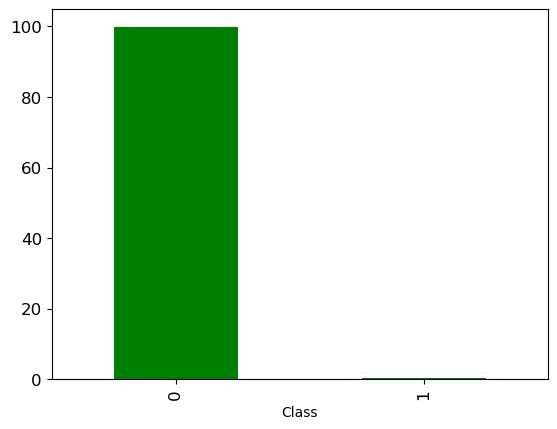

In [10]:
# Check the value-counts of both the negative and positive class
class_percent_distribution = (df["Class"].value_counts() / len(df))*100  

# Plotting the bar graph to visualize the distibution
class_percent_distribution.plot(kind="bar",color="green",fontsize =12)

**Problem: Imbalanced Class Distribution**

It can be seen that the negative class significantly outnumbers the positive class, with the positive class accounting for less than 1% of the total data. This imbalance poses a problem as the model may struggle to accurately categorize the positive class when exposed to new, unseen data.


<Axes: >

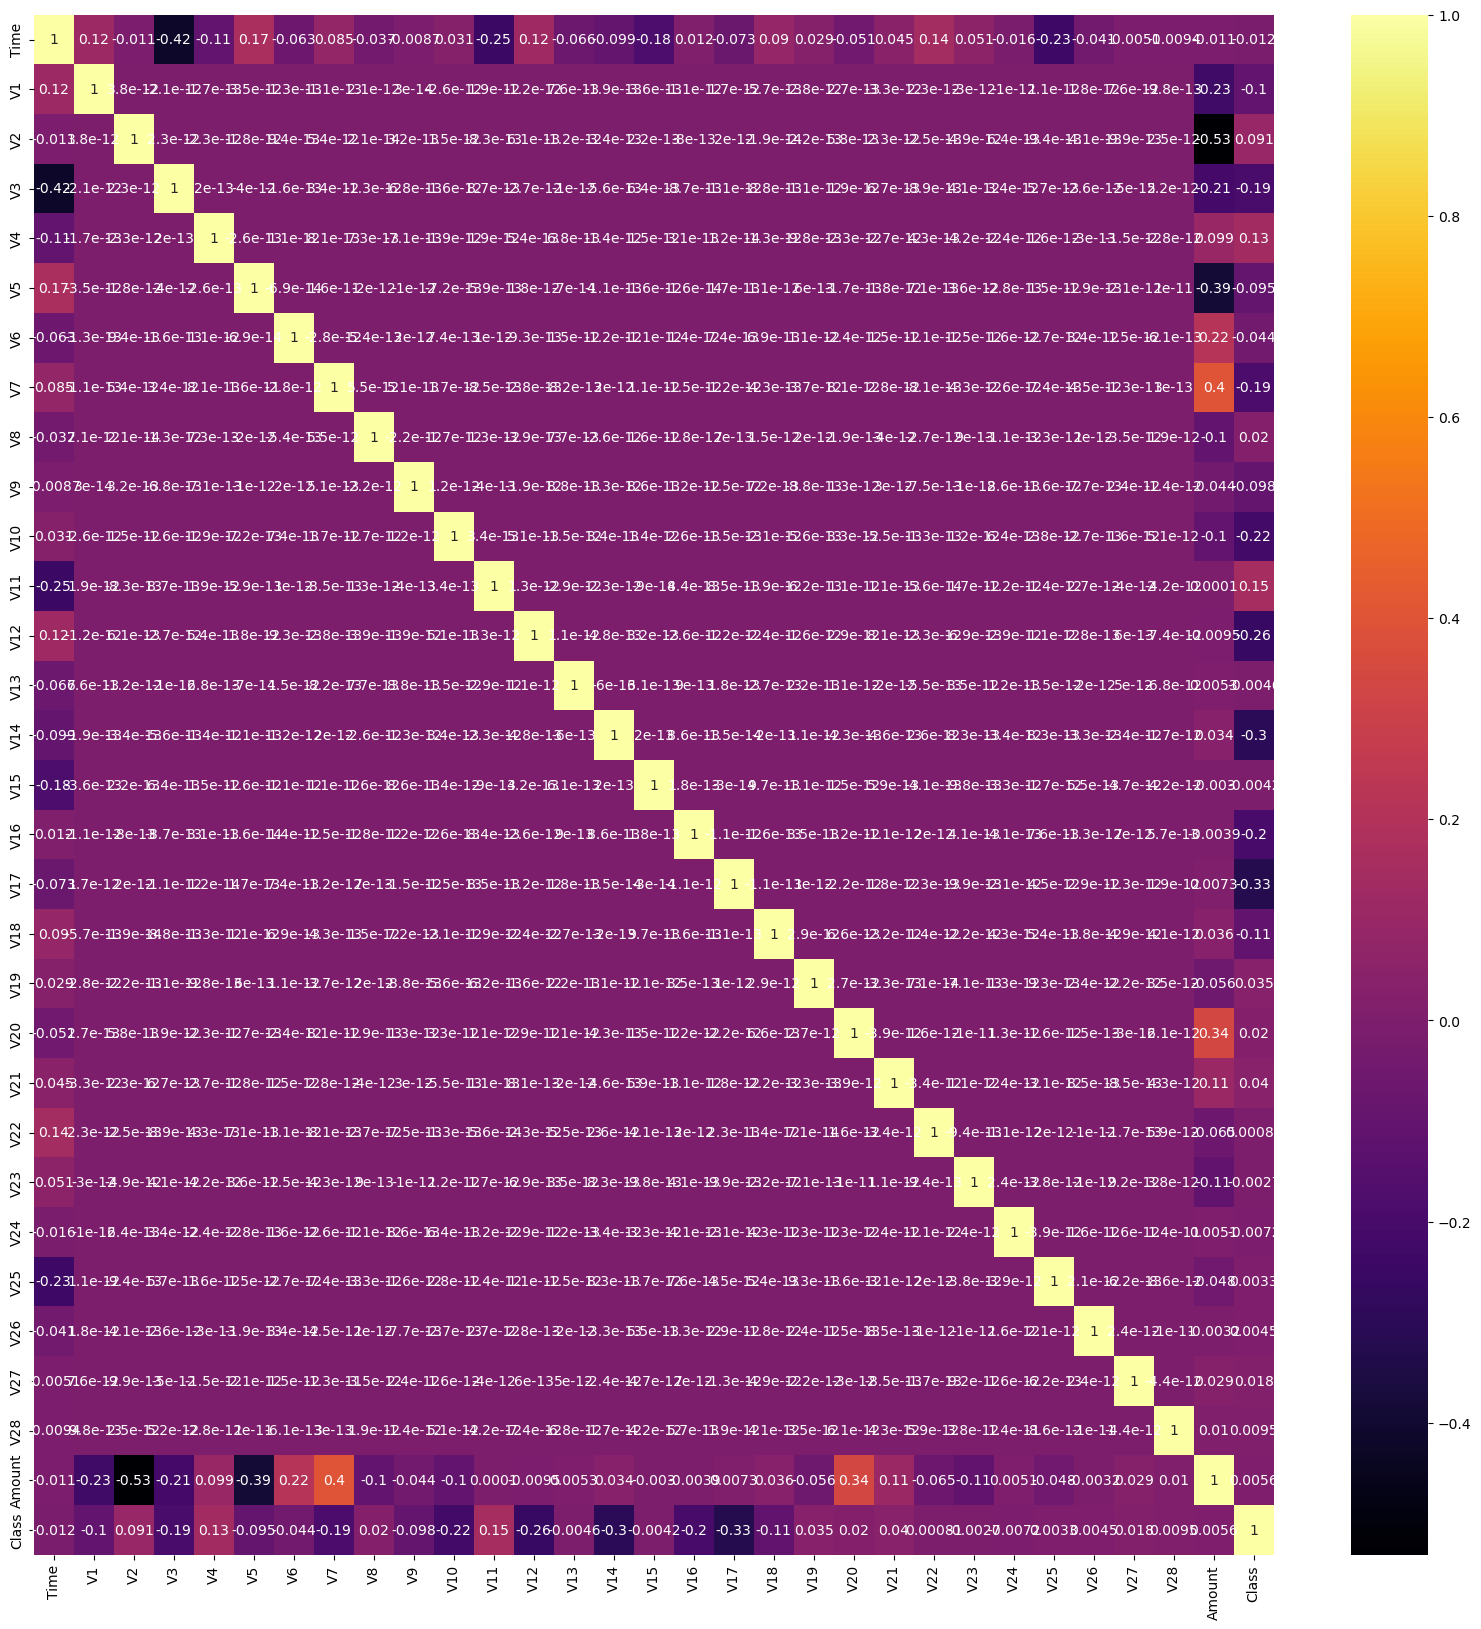

In [11]:
corr = df.corr()                   # To identify the correlation between features
plt.figure(figsize=(20,20))        # Fixing the figure or image size  
sns.heatmap(corr, annot=True,cmap = "inferno")  # Visualizing the correlation using the heatmap

**Heatmap Insights:**

Not much can be concluded from the heatmap, except that some features are positively related, while others are negatively related to the target feature.  
Also no feature is showing very high correlation with the target variable, so it might be possible to drop some of the features without losing any relevant information. 


In [12]:
# Importing the sweetviz library
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


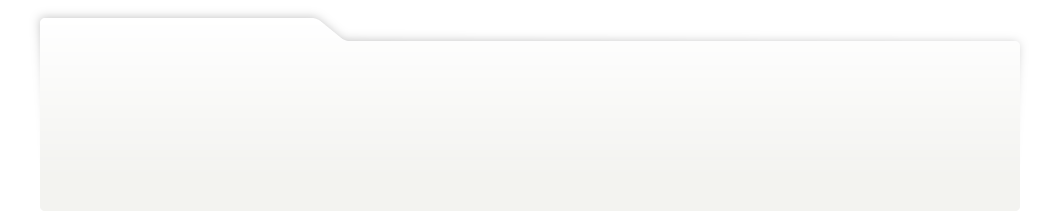
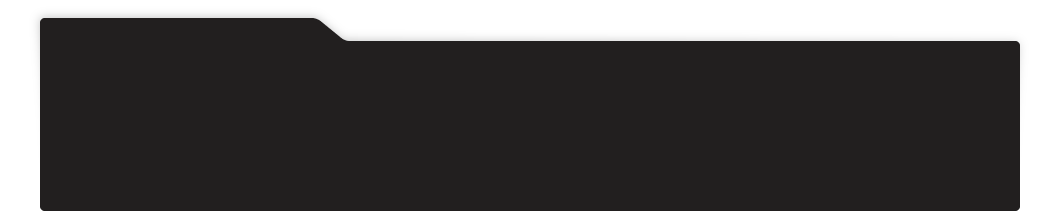
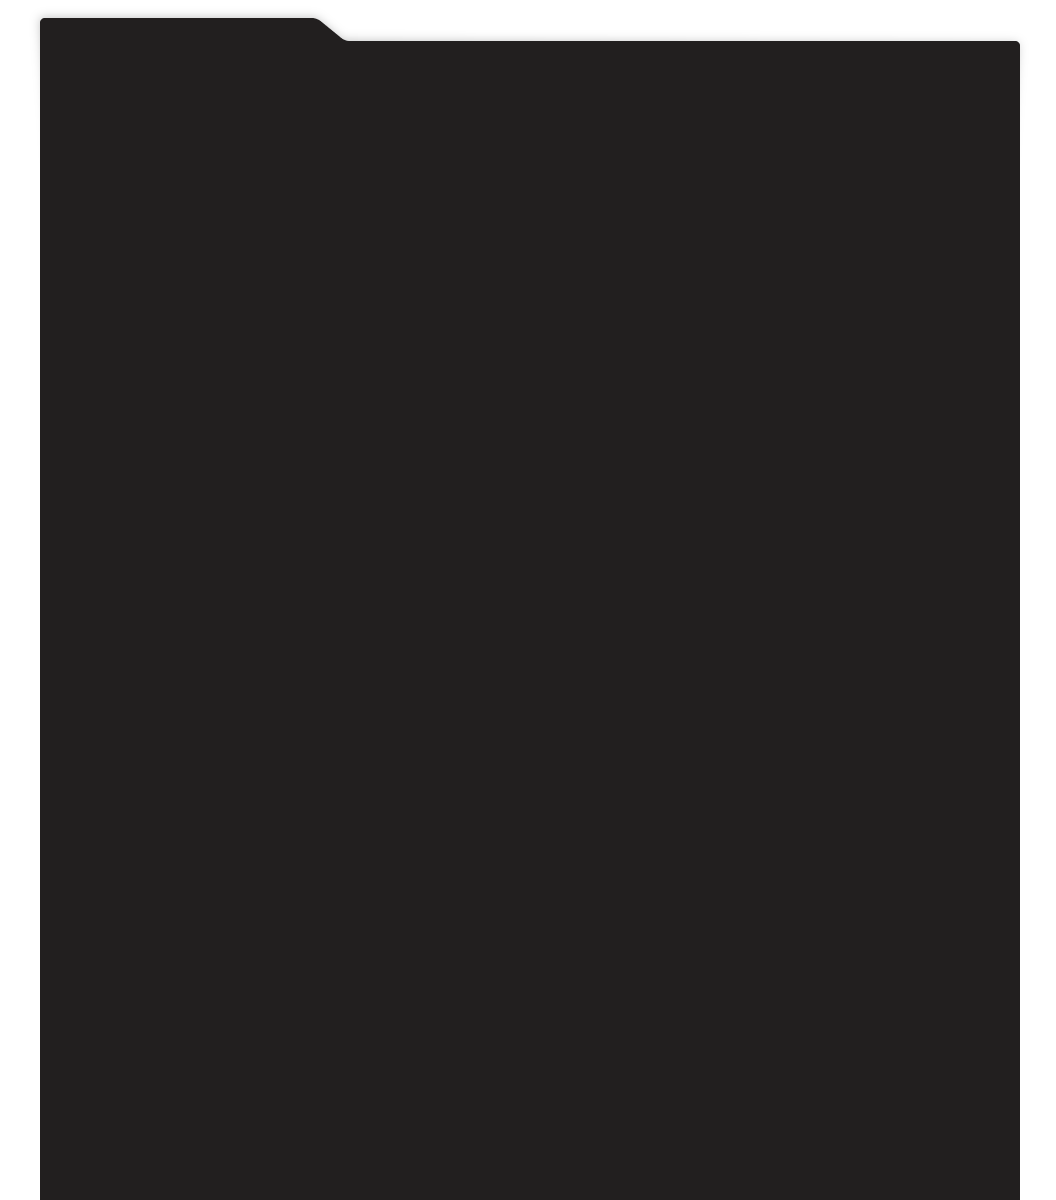
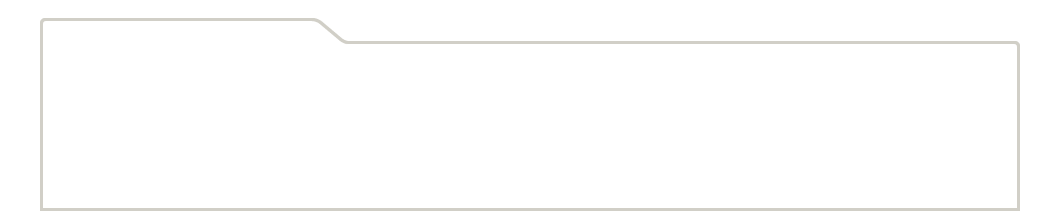
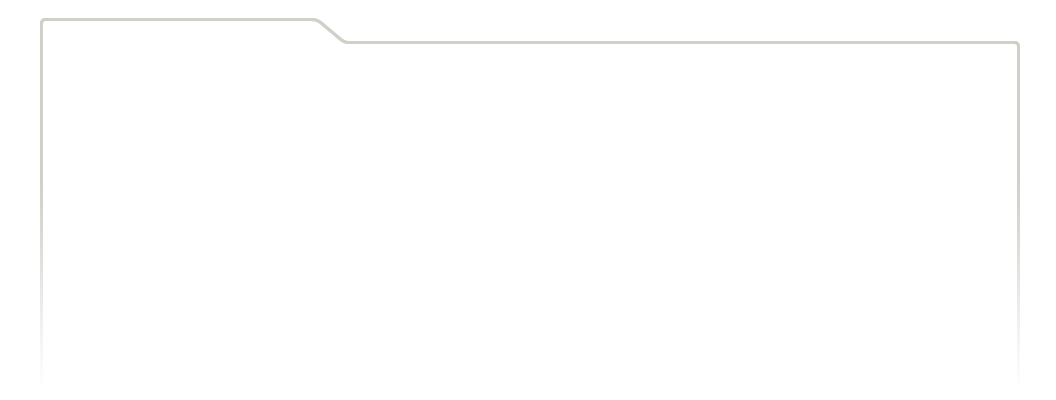
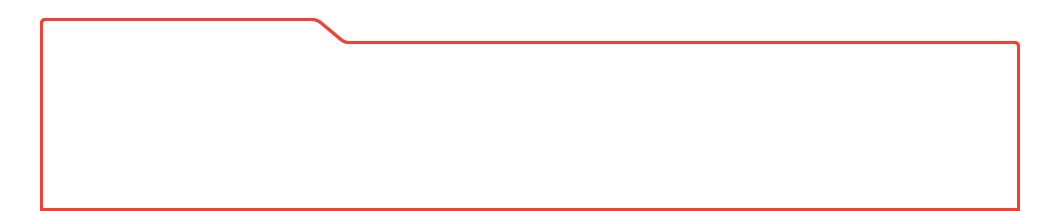
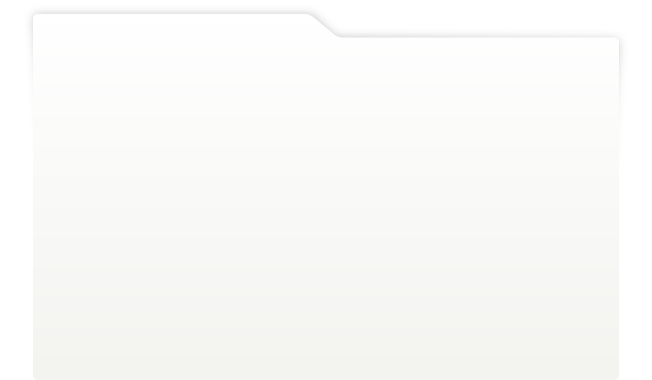
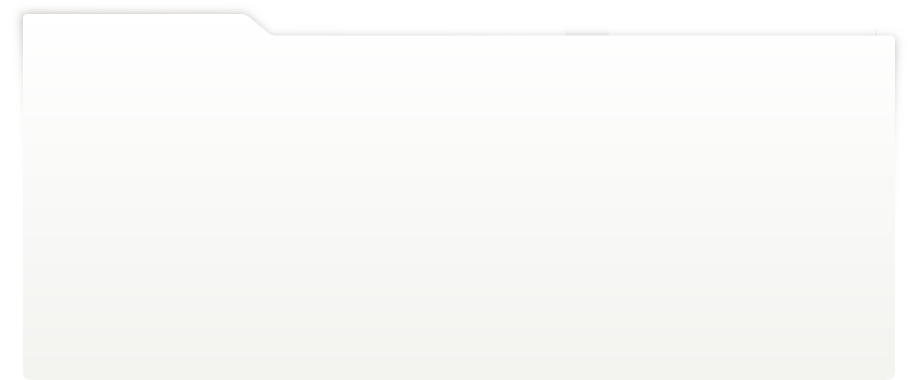
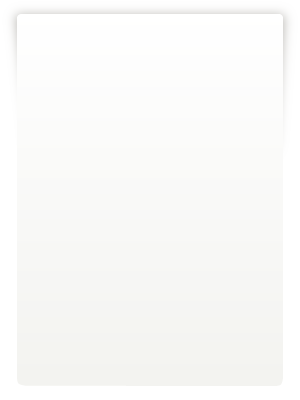
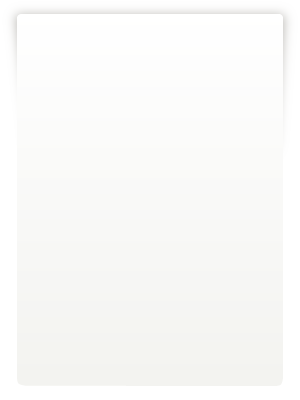
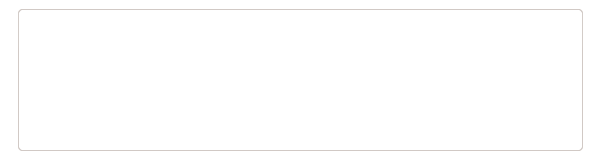
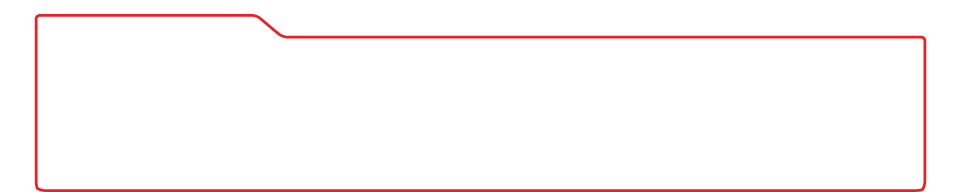
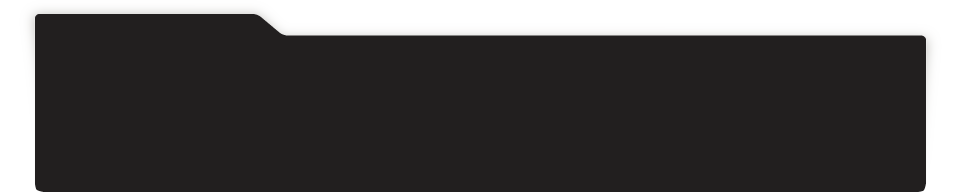
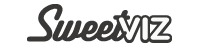
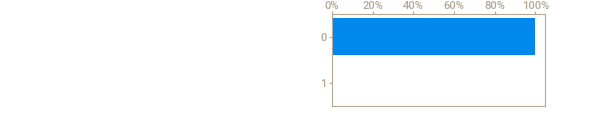
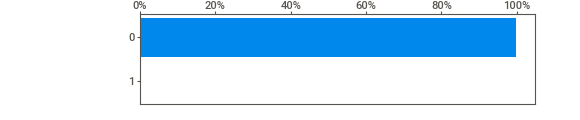
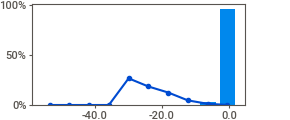
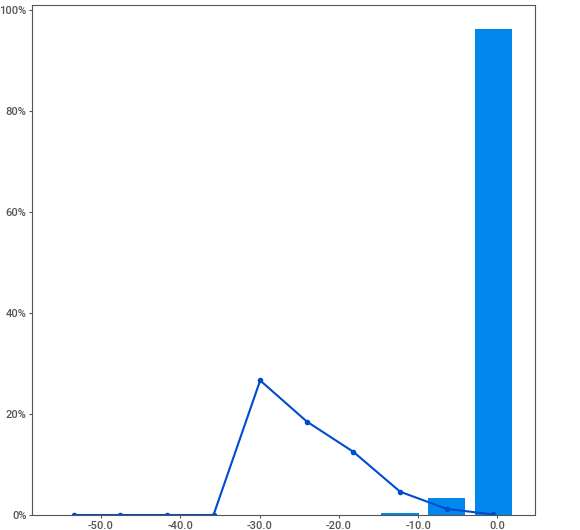
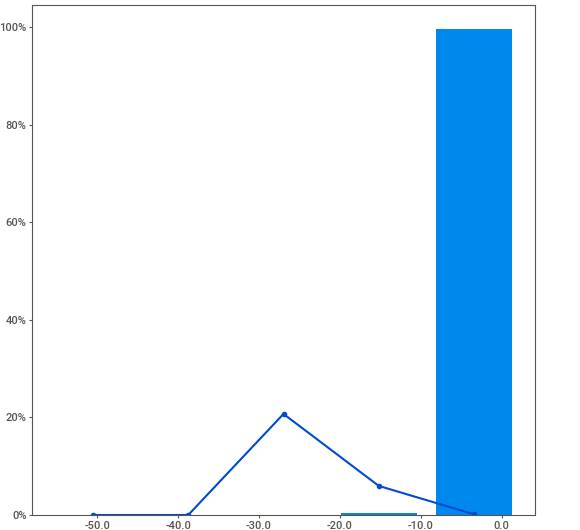
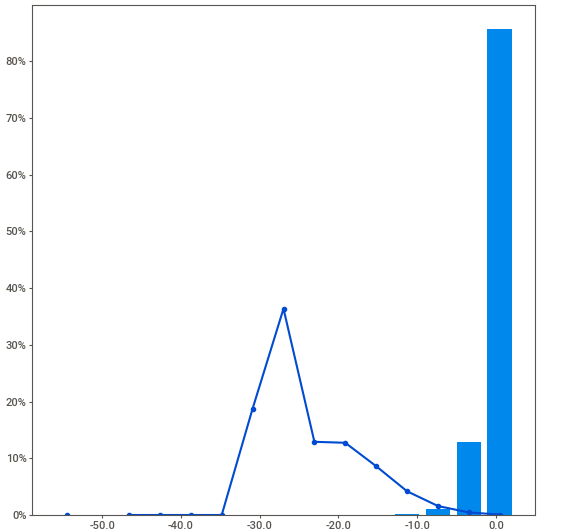
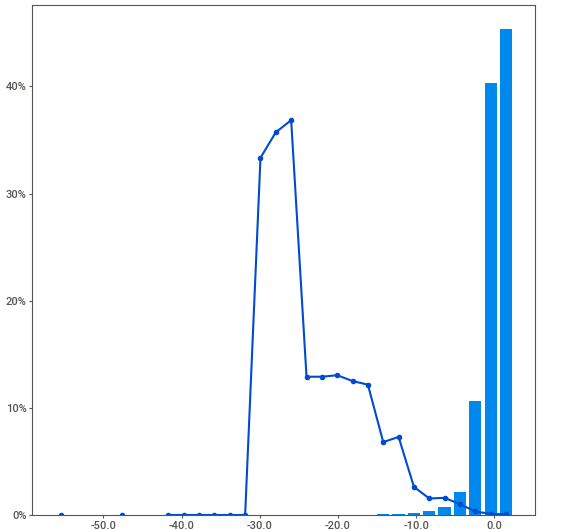
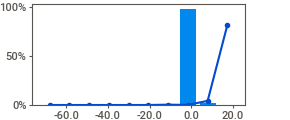
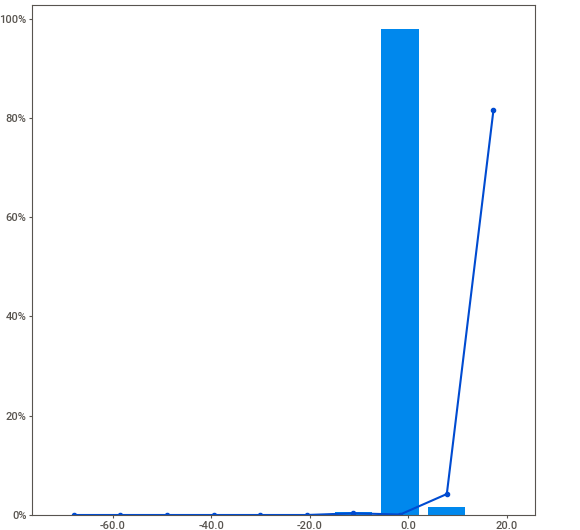
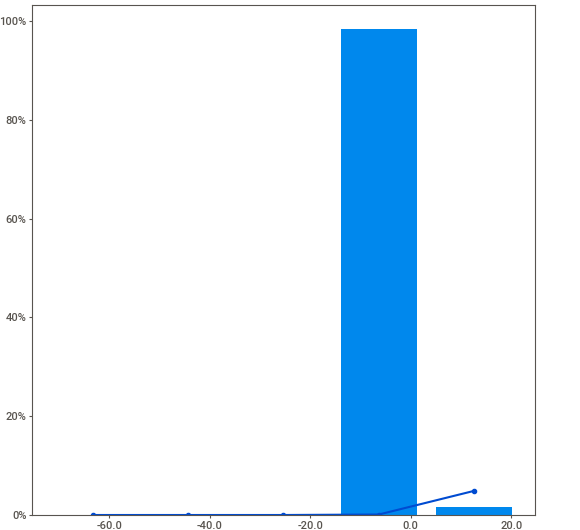
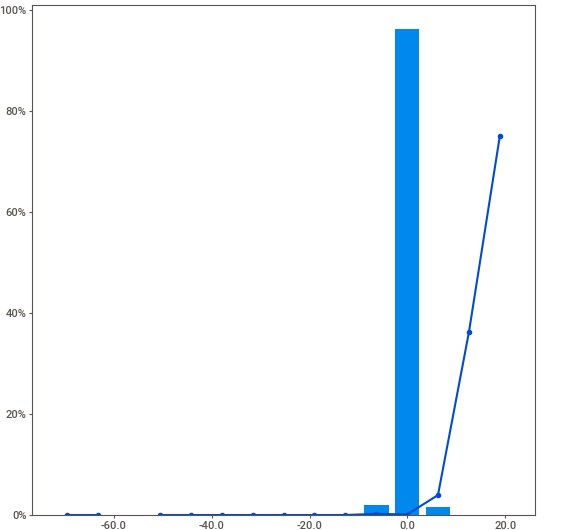
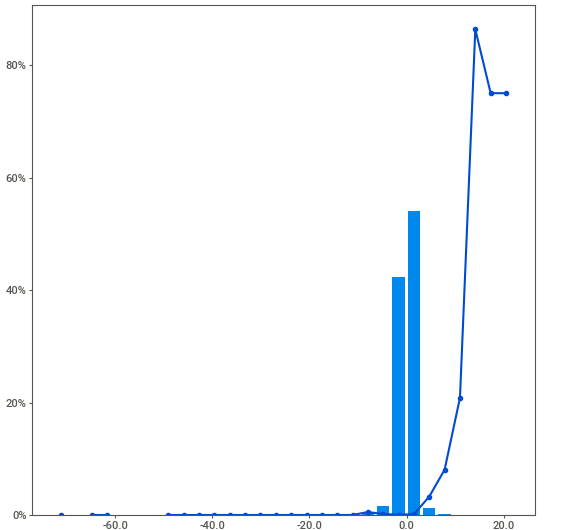
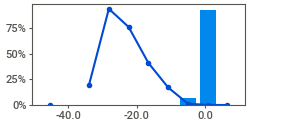
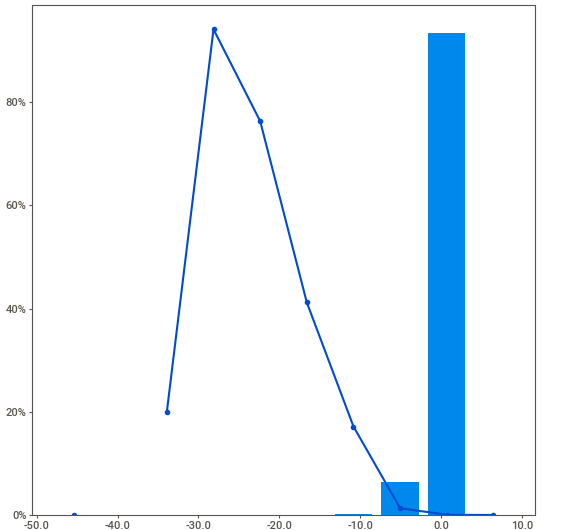
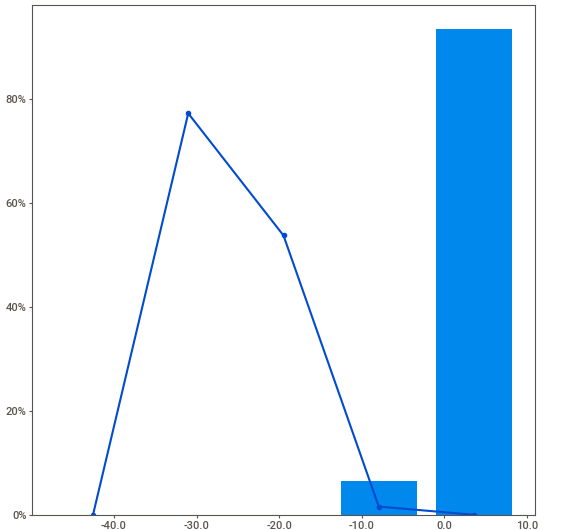
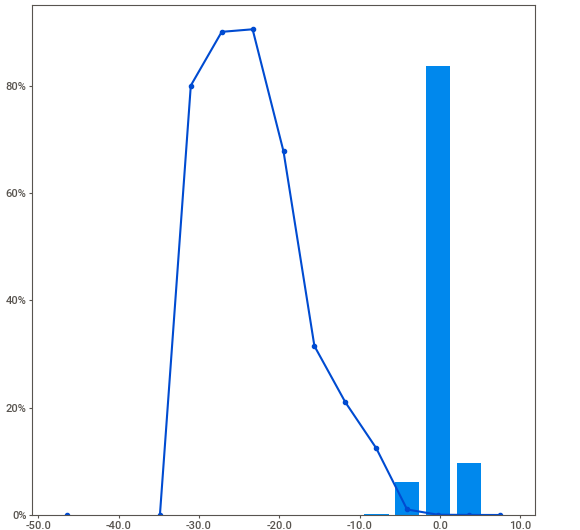
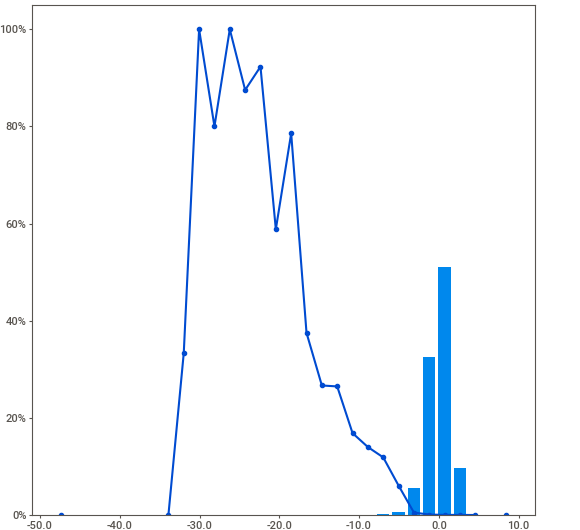
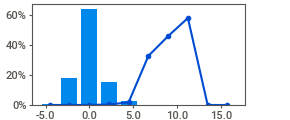
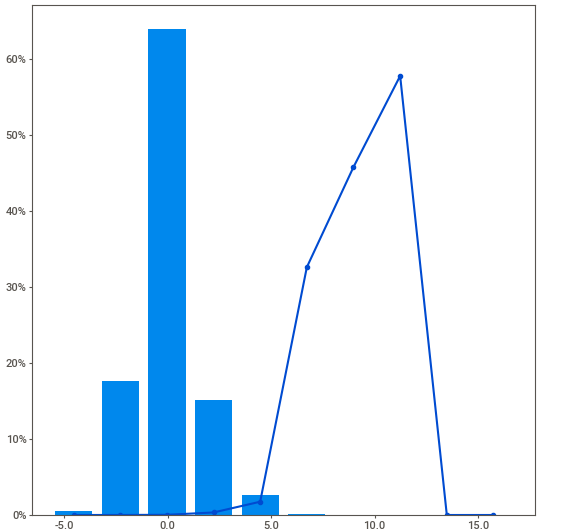
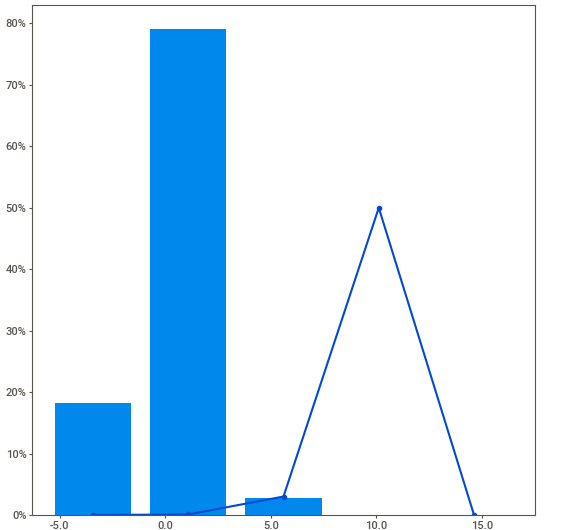
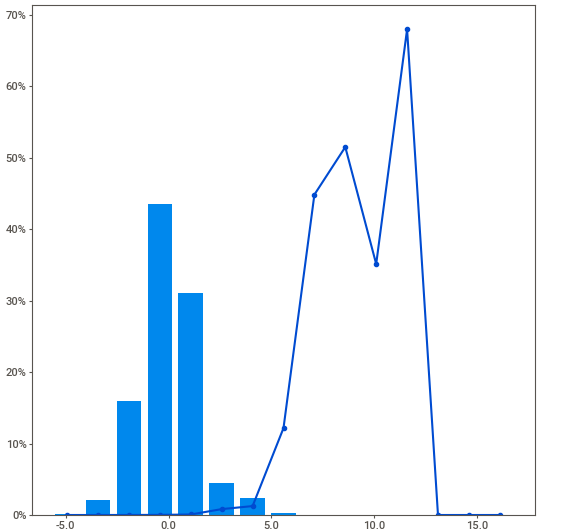
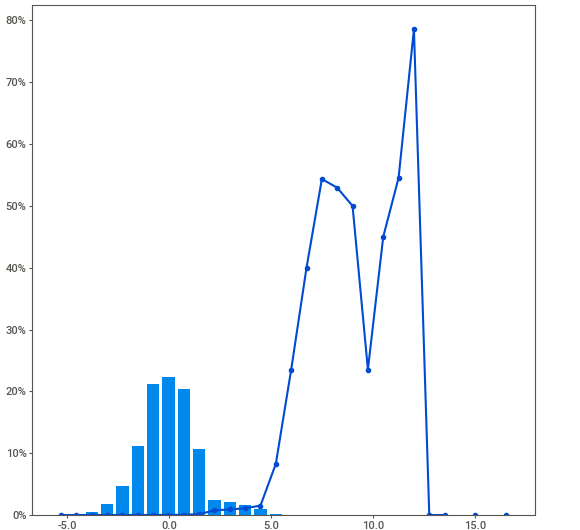
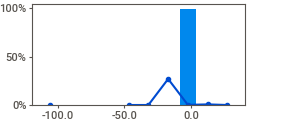
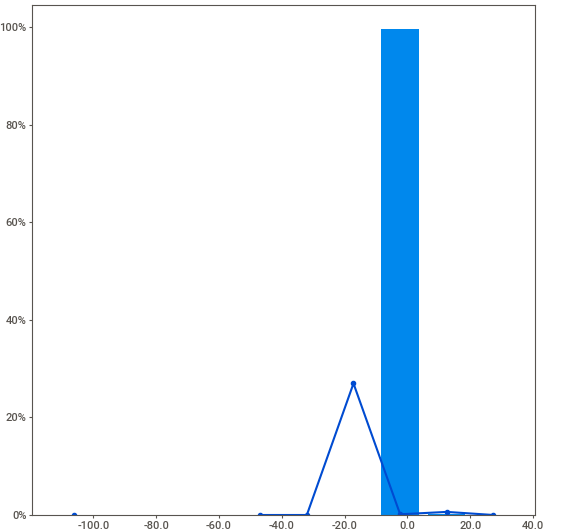
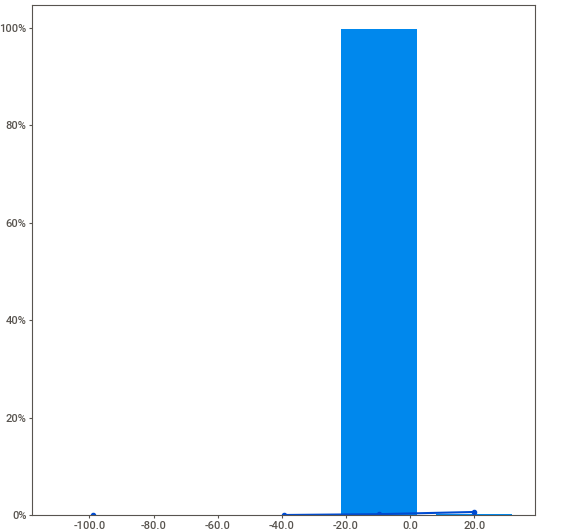
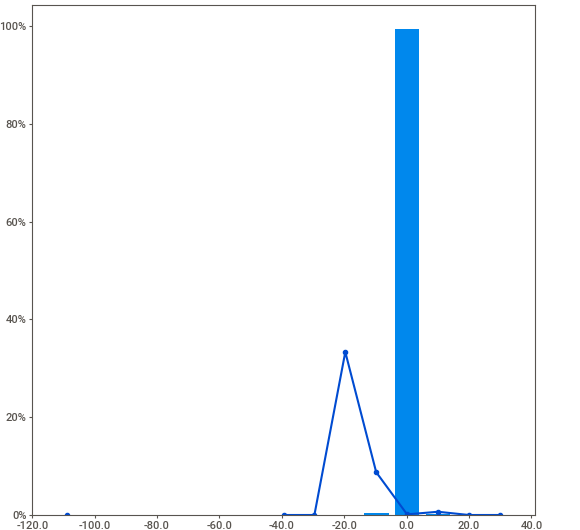
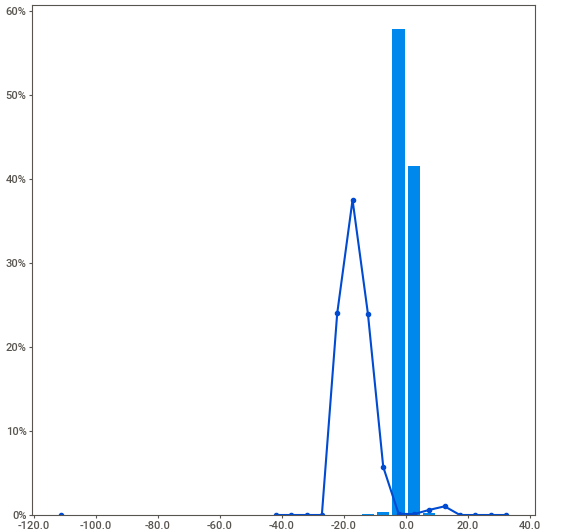
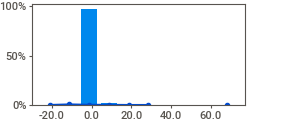
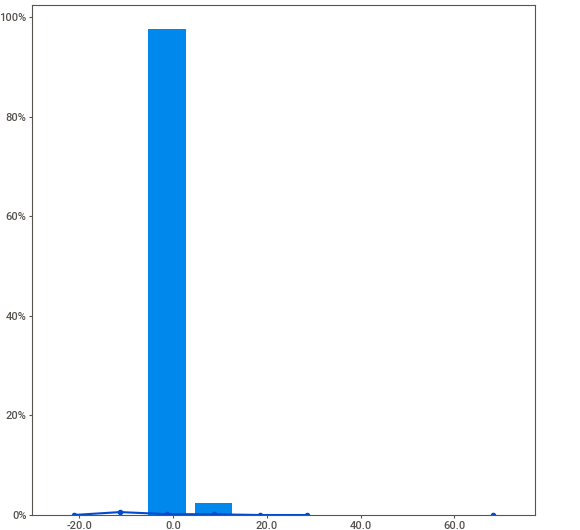
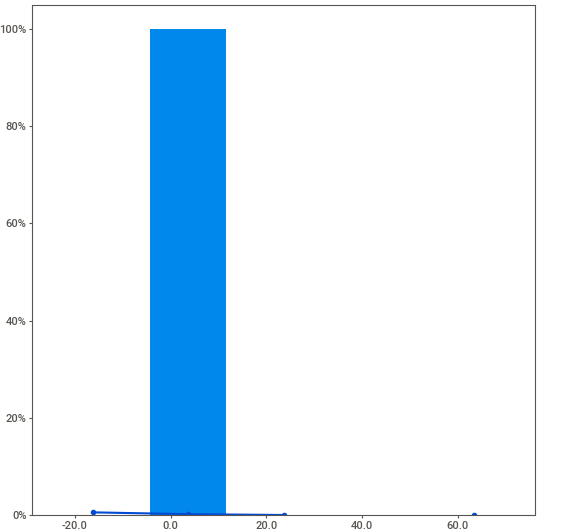
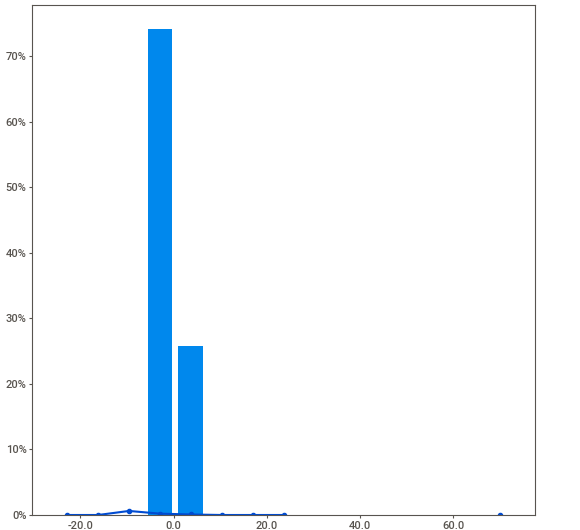
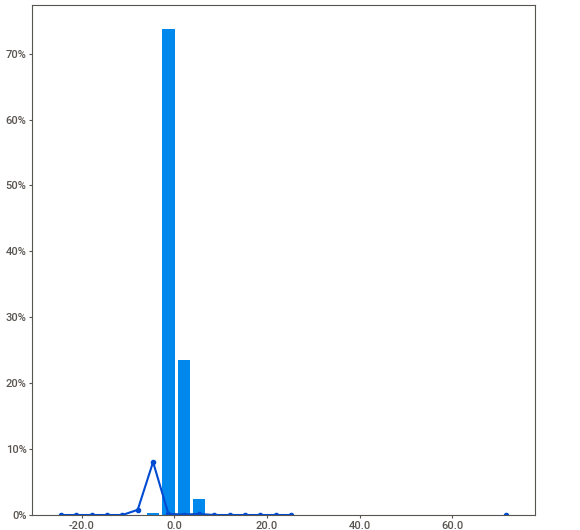
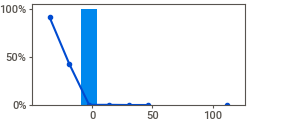
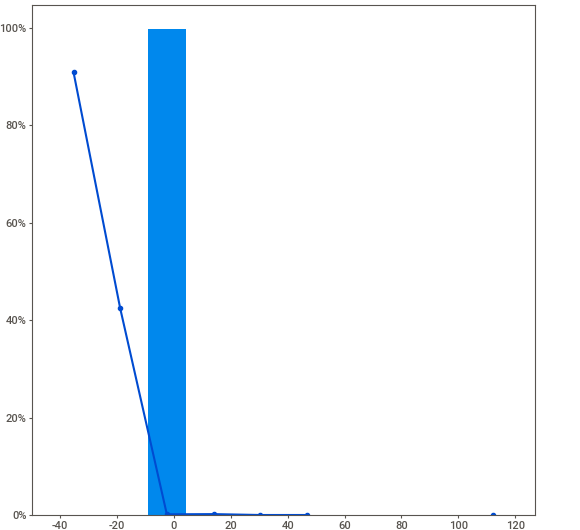
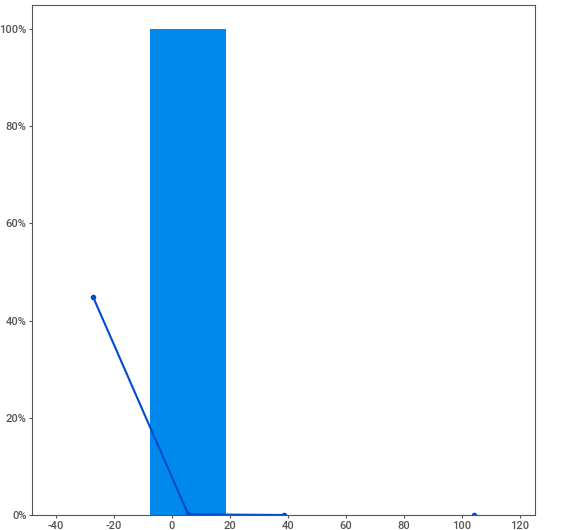
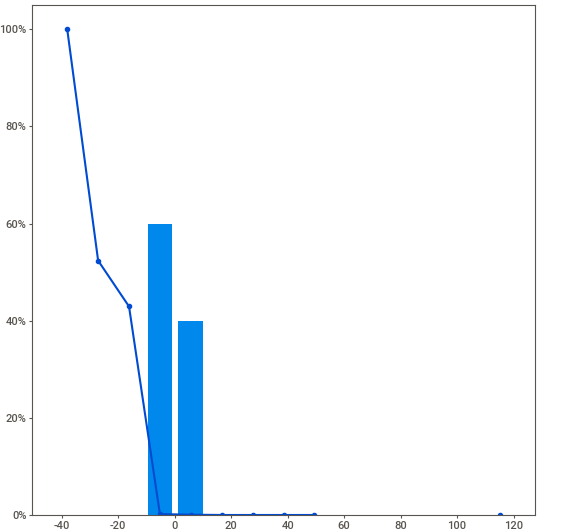
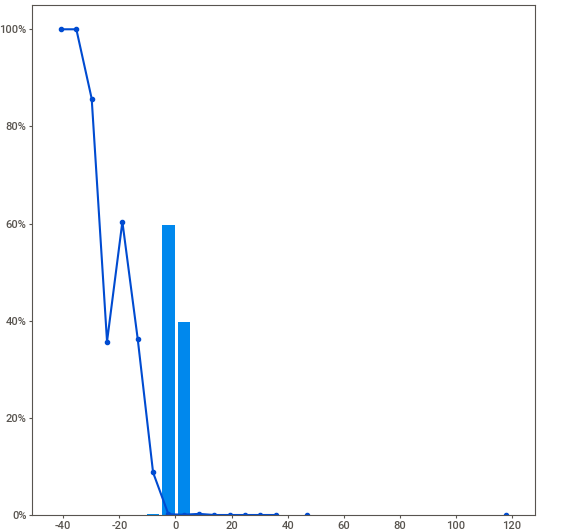
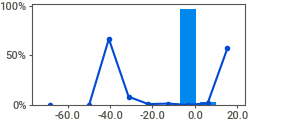
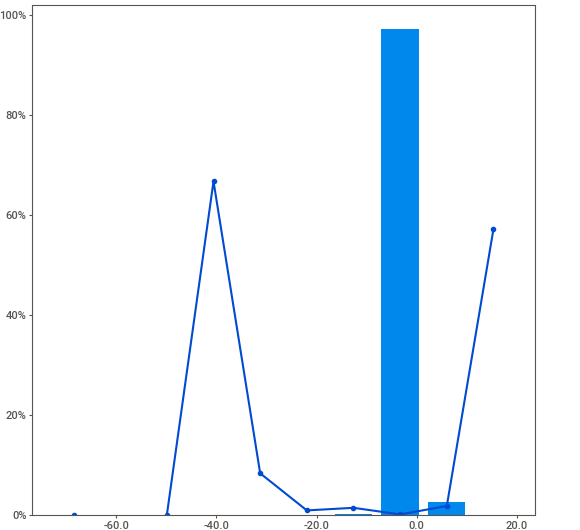
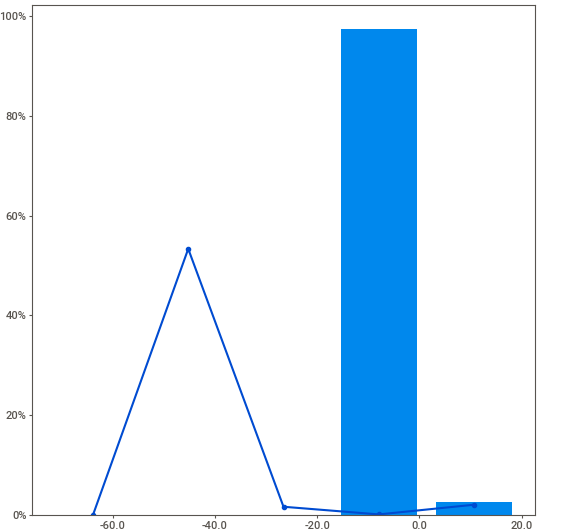
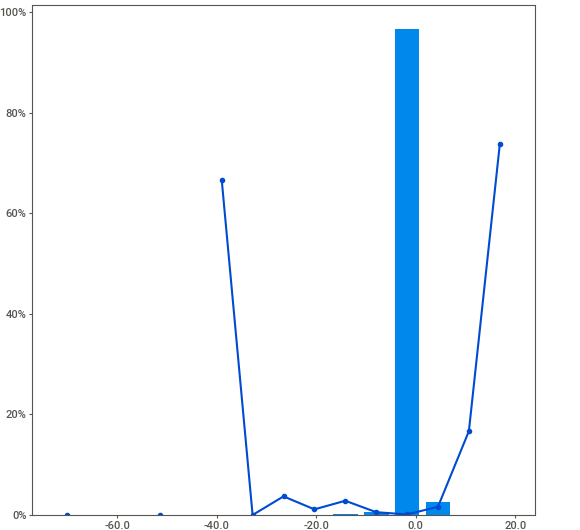
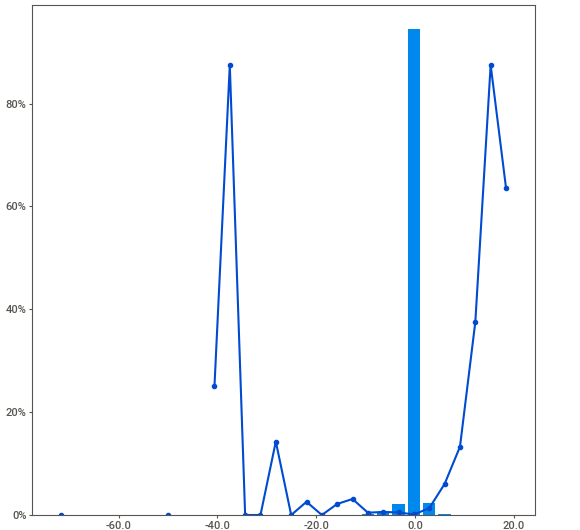
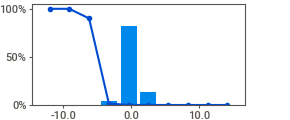
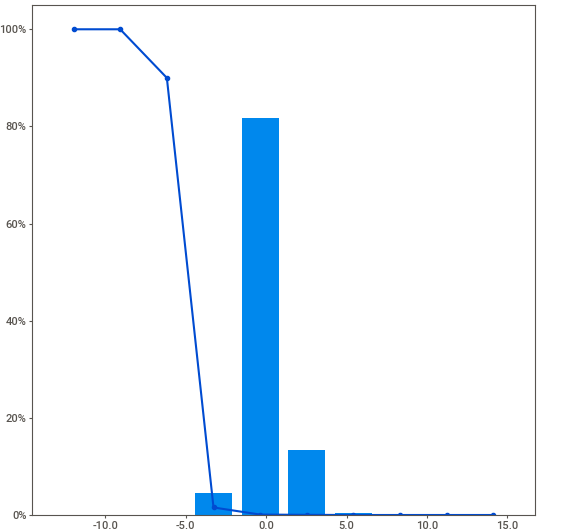
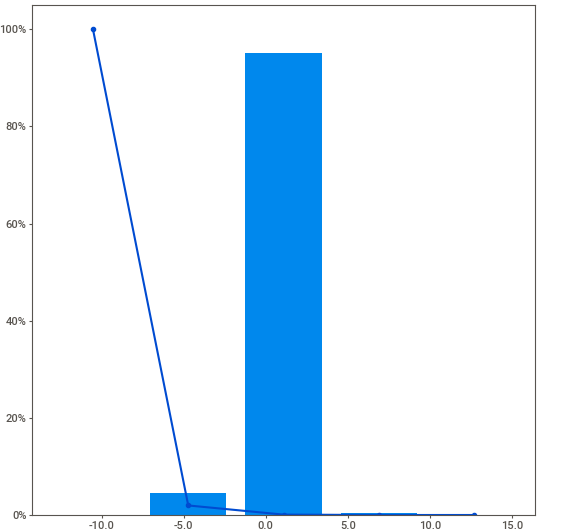
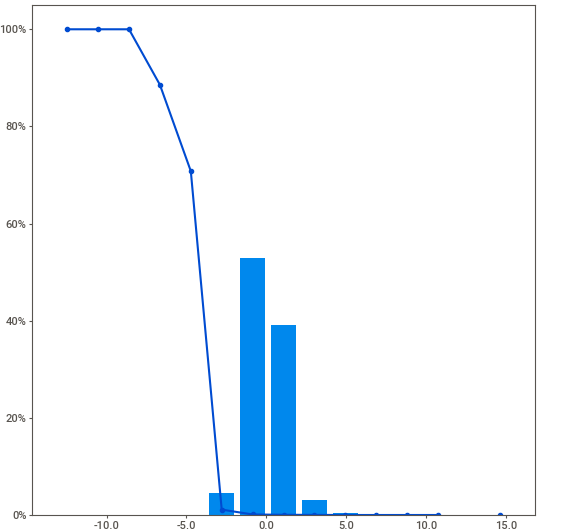
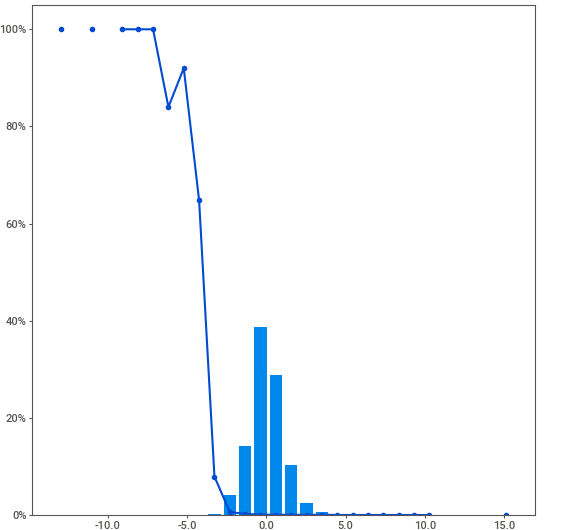
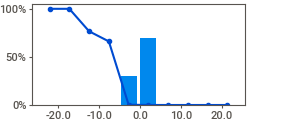
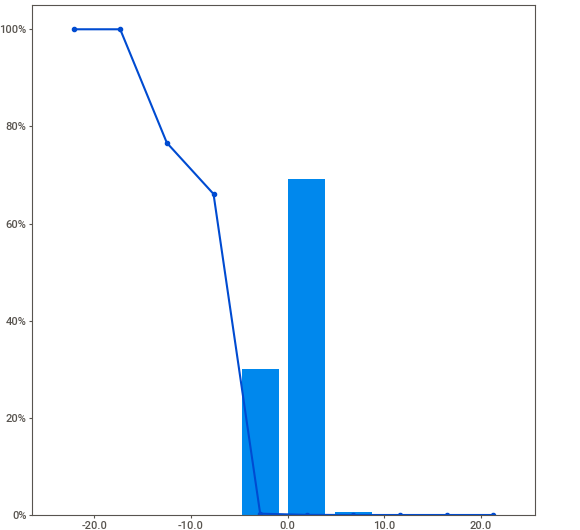
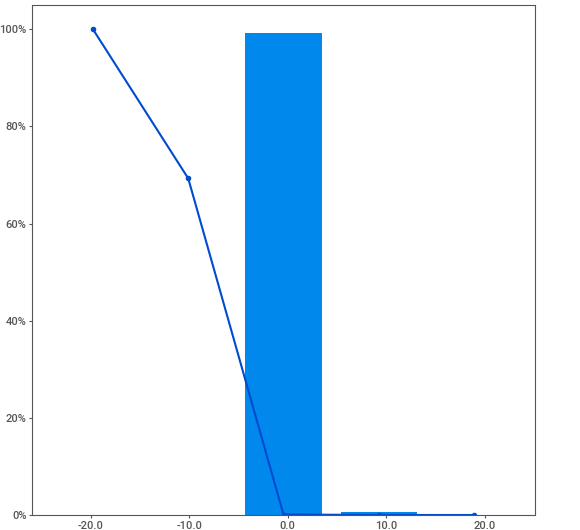
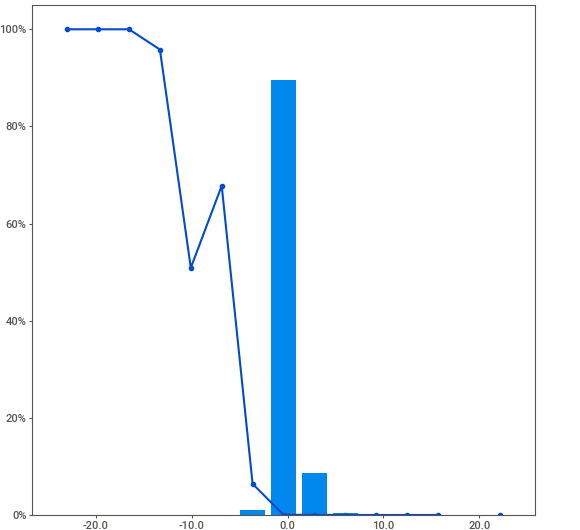
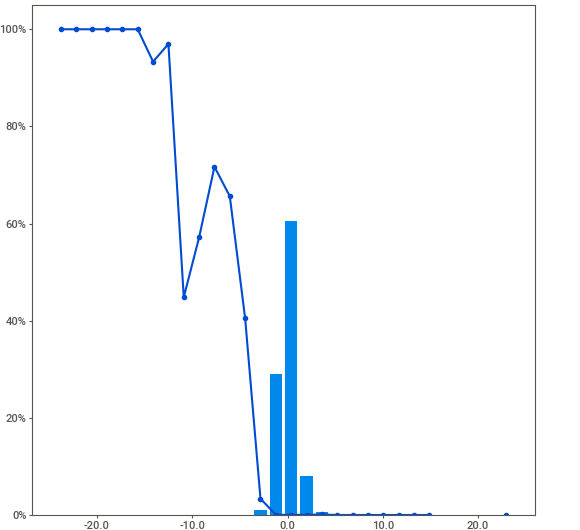
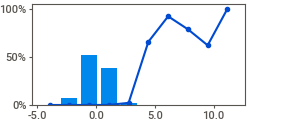
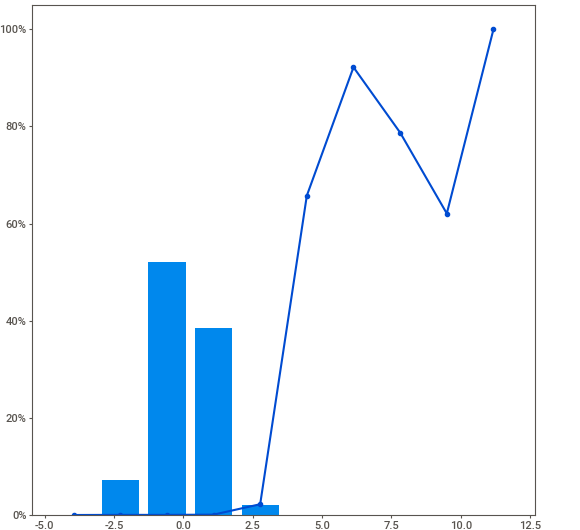
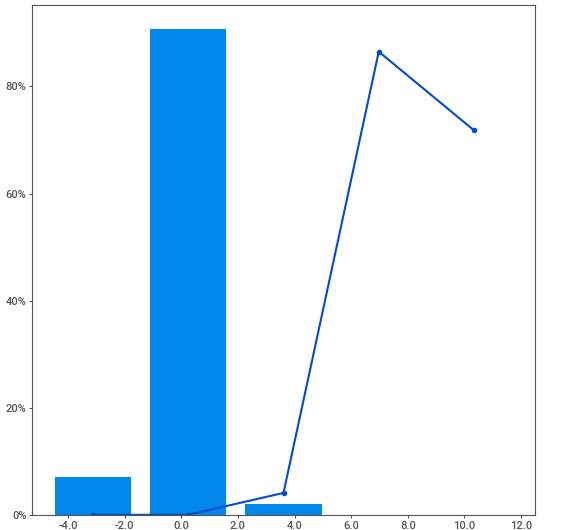
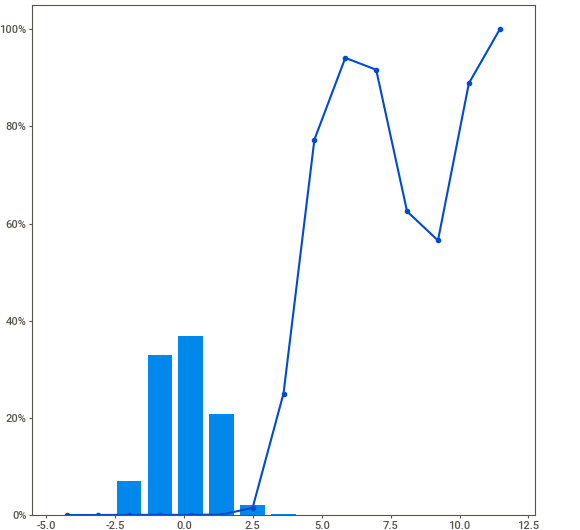
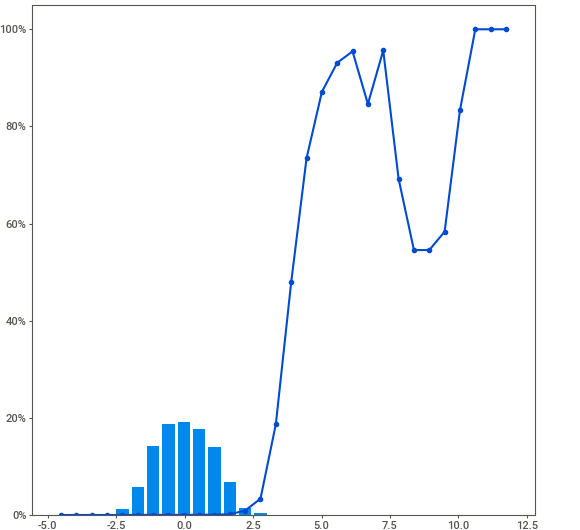
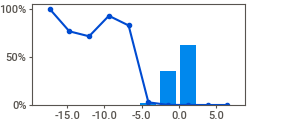
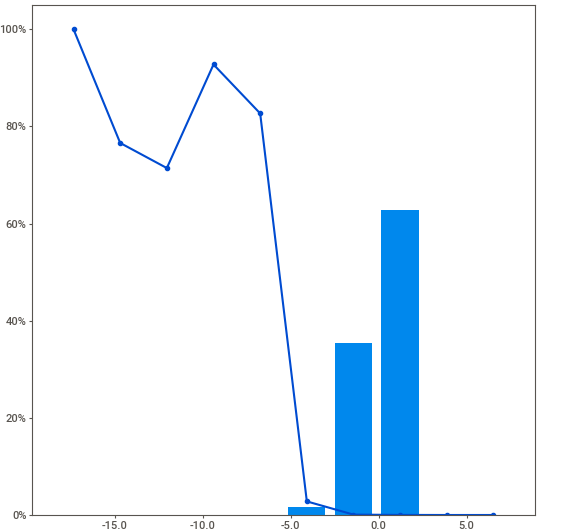
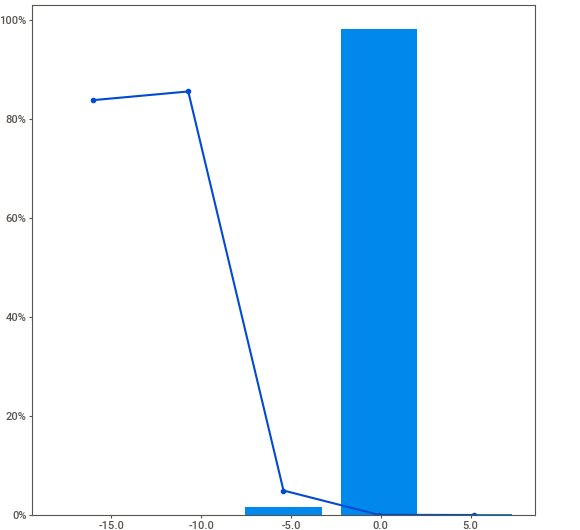
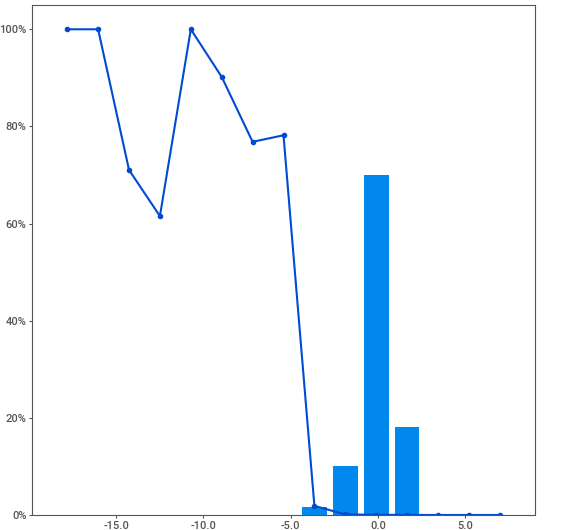
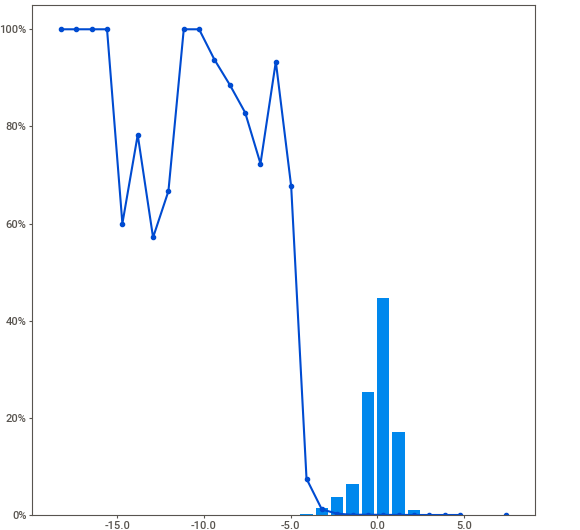
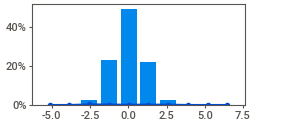
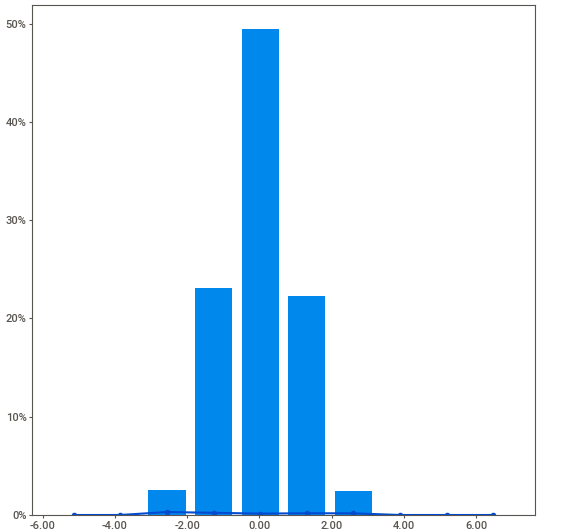
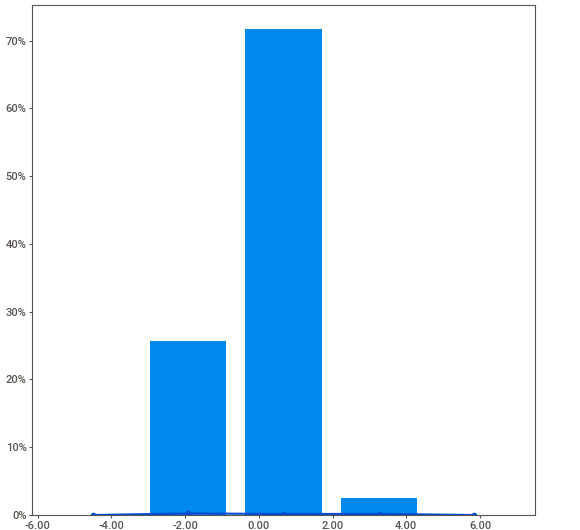
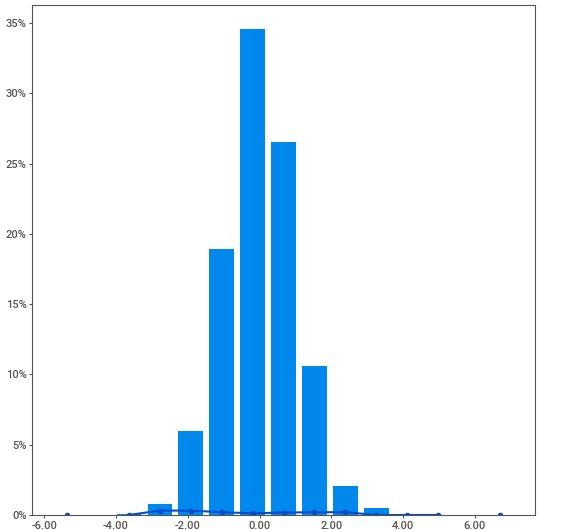
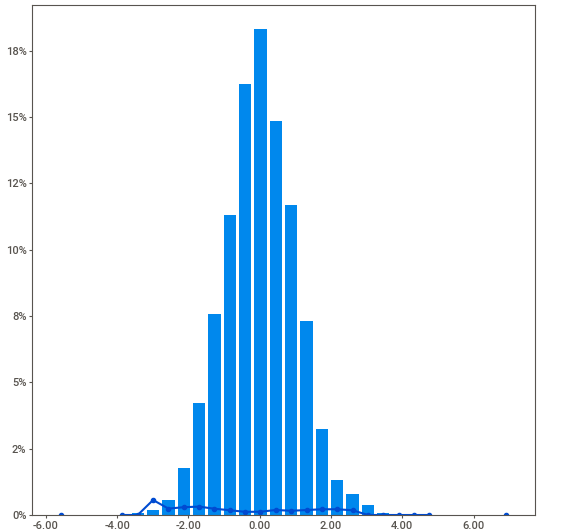
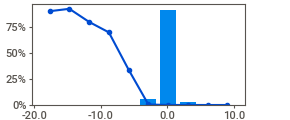
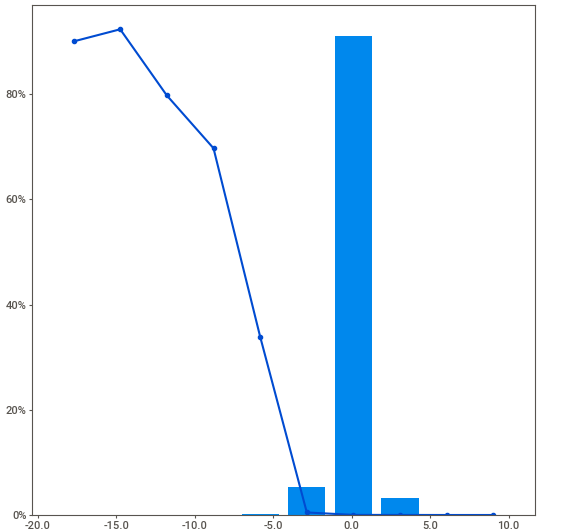
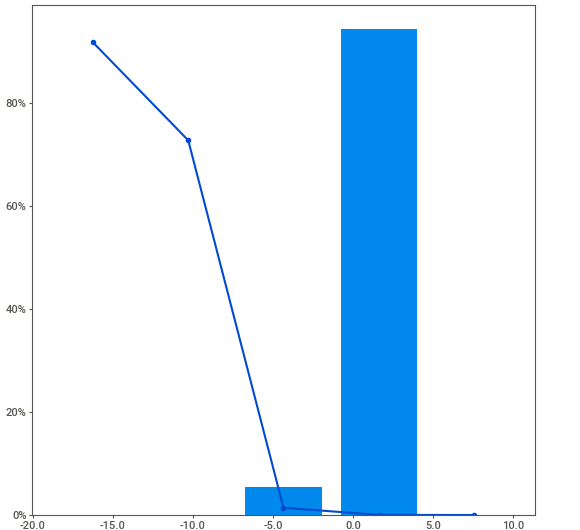
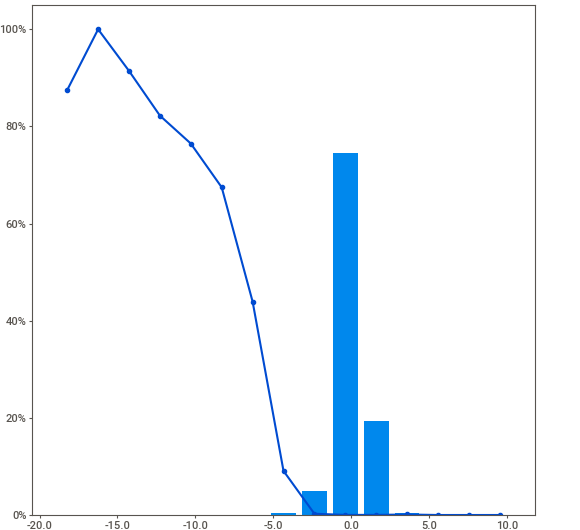
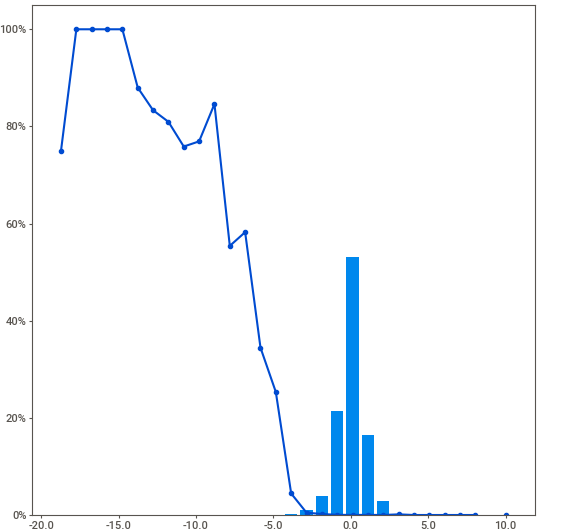
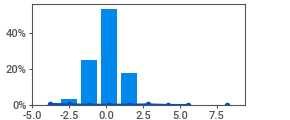
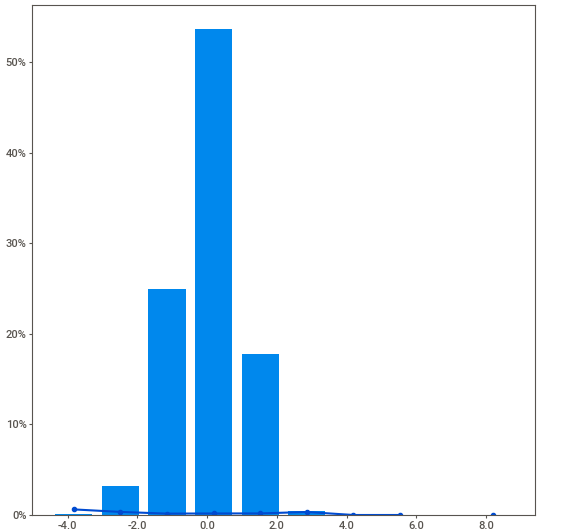
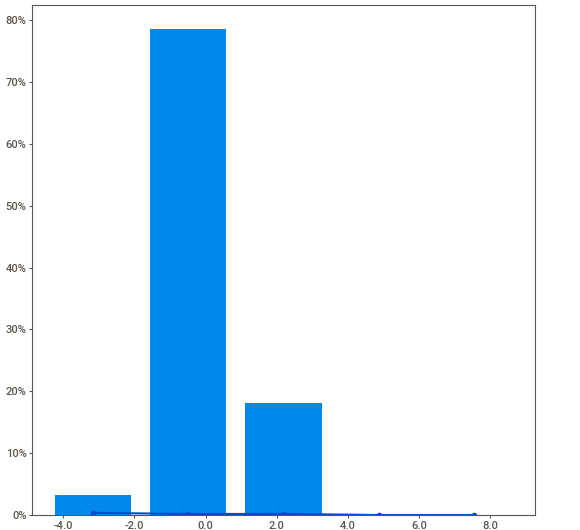
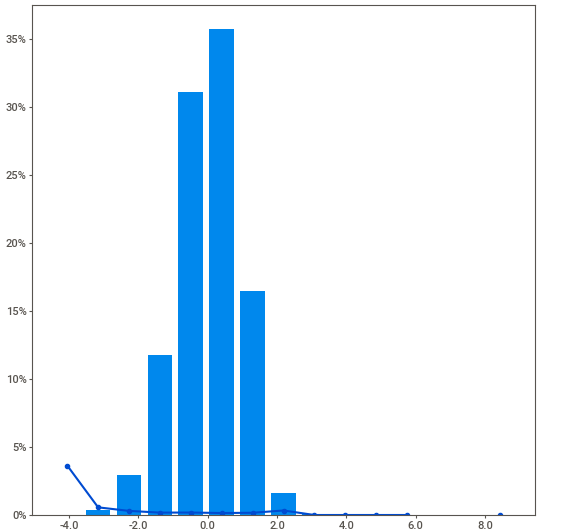
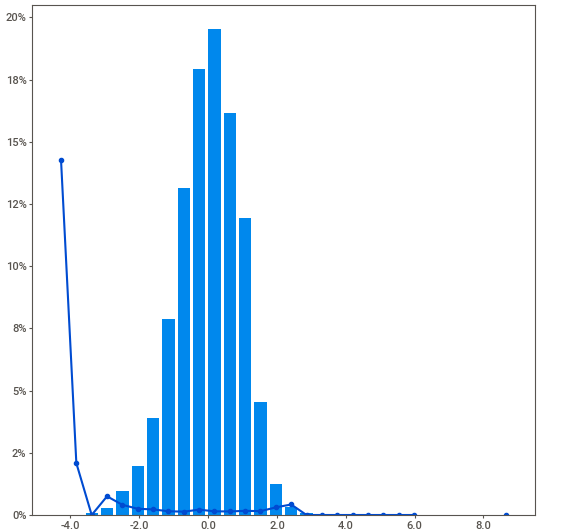
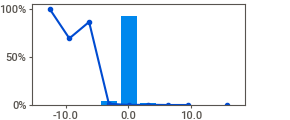
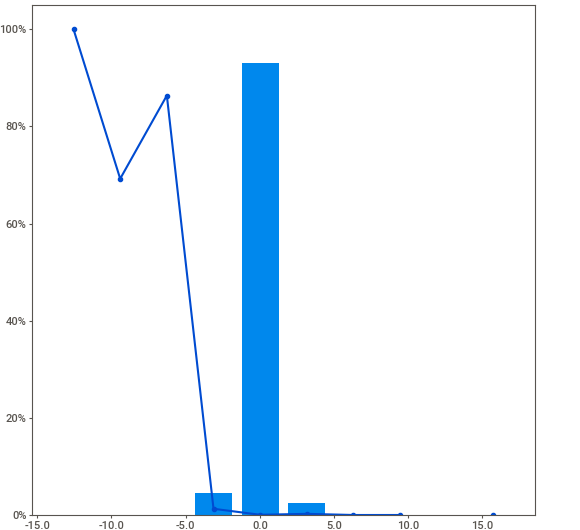
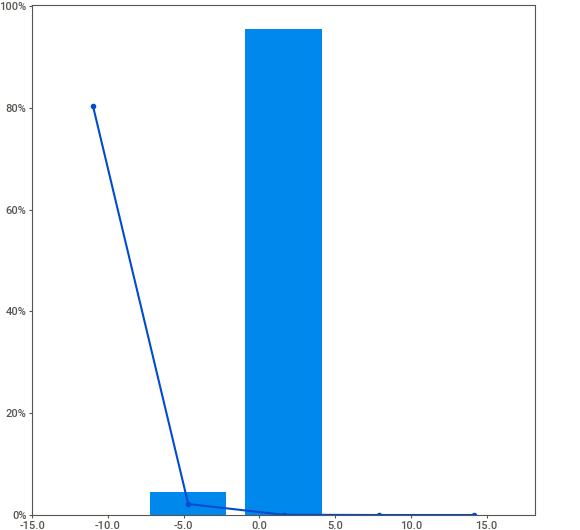
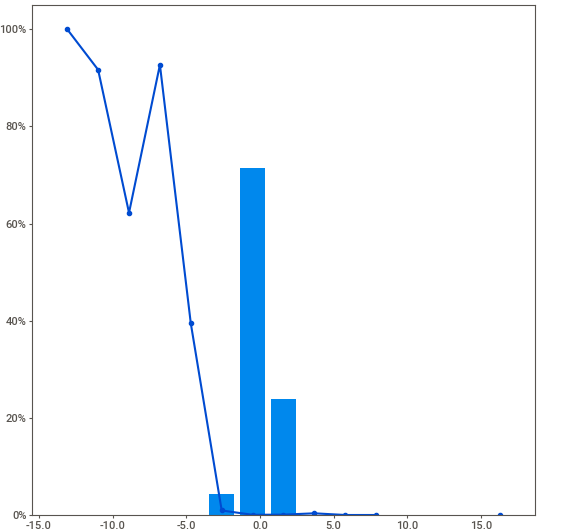
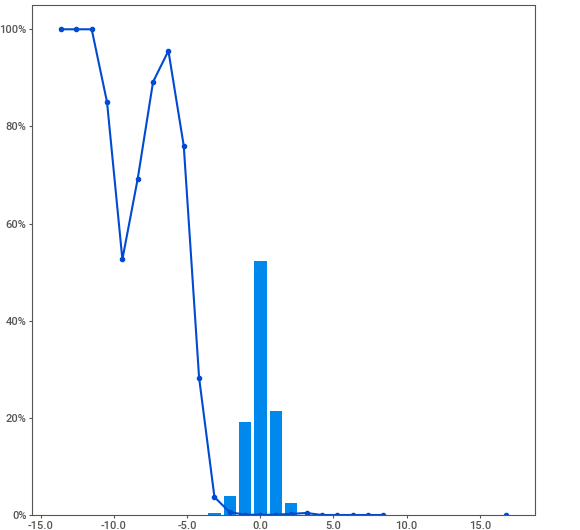
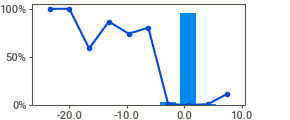
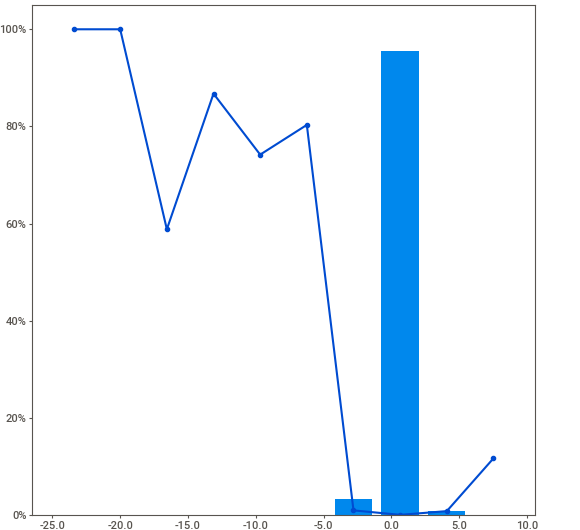
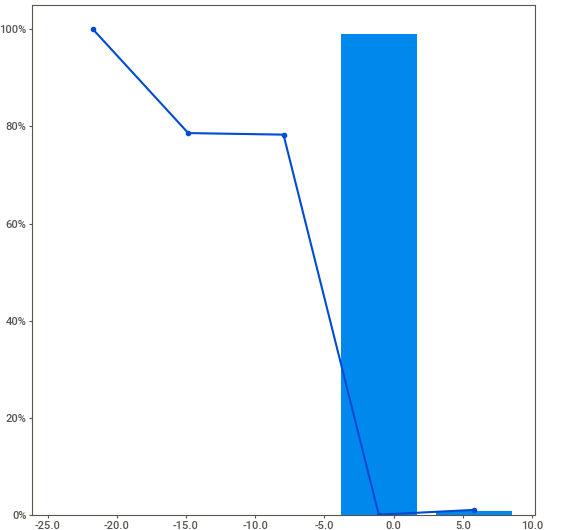
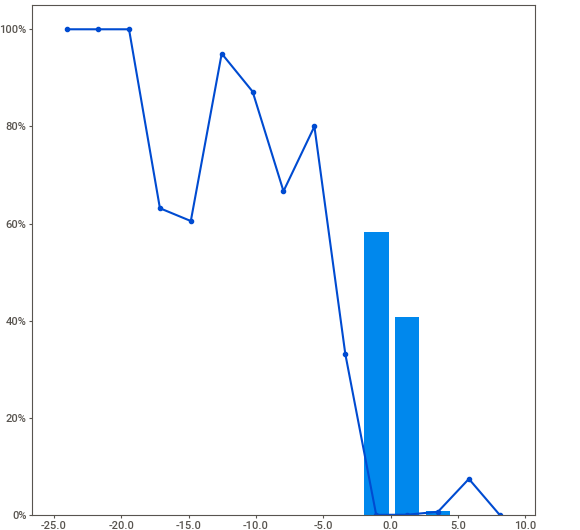
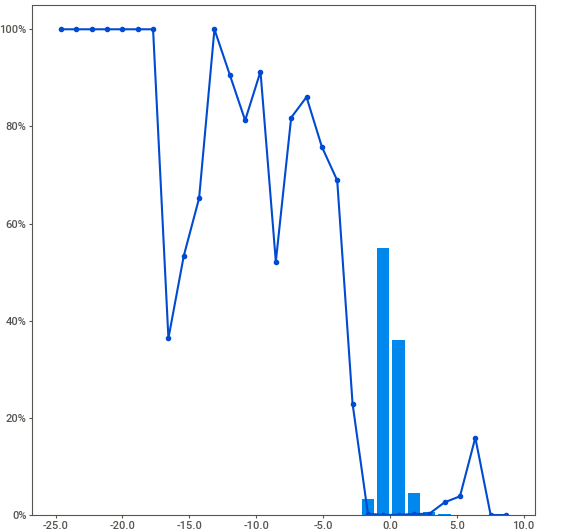
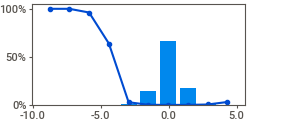
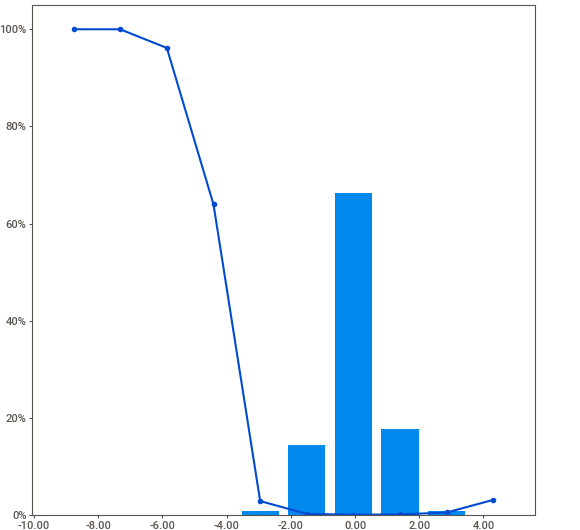
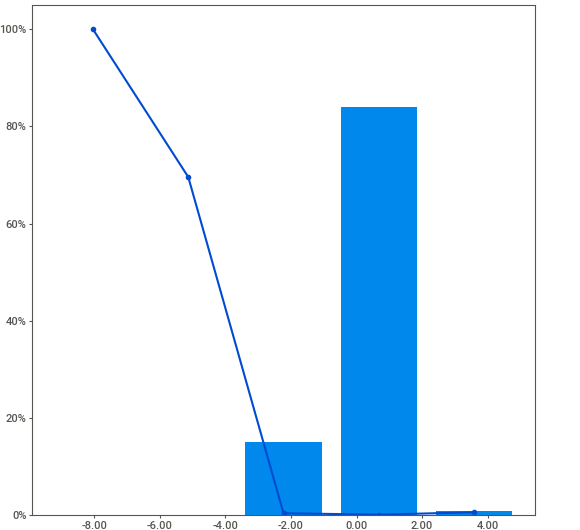
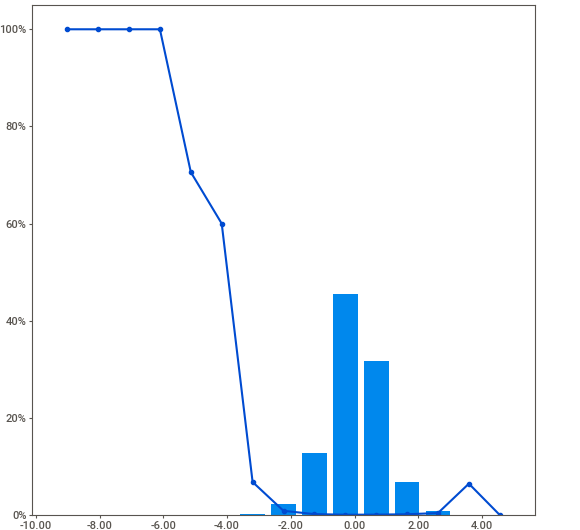
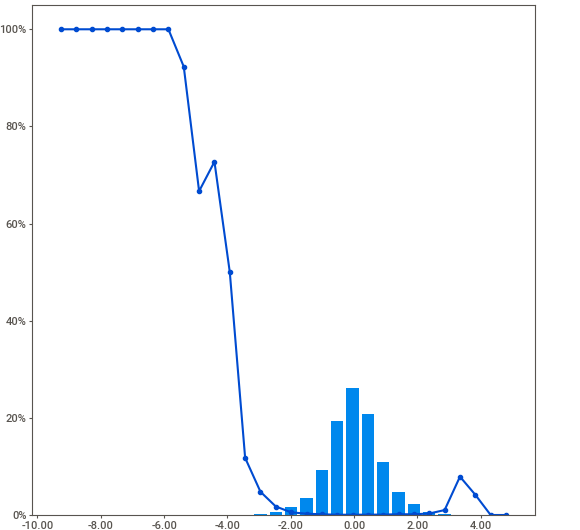
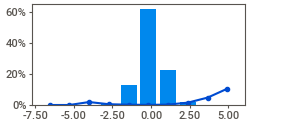
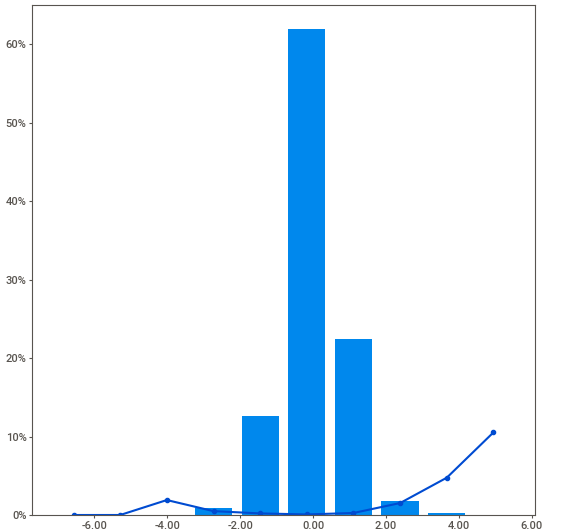
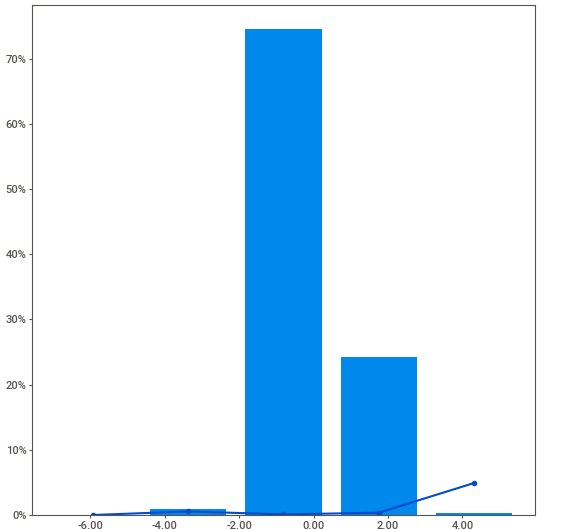
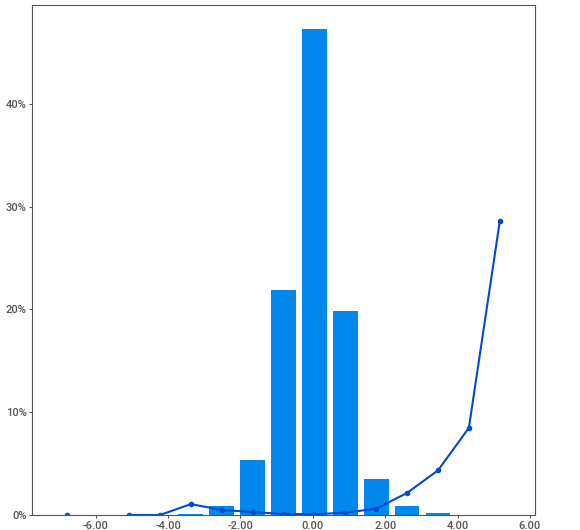
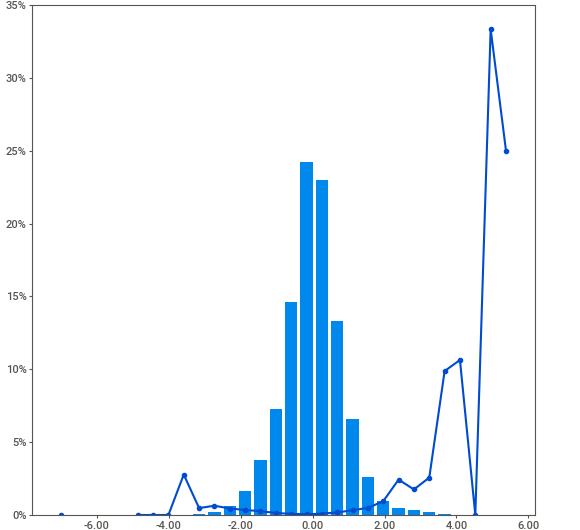
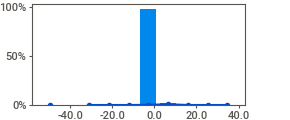
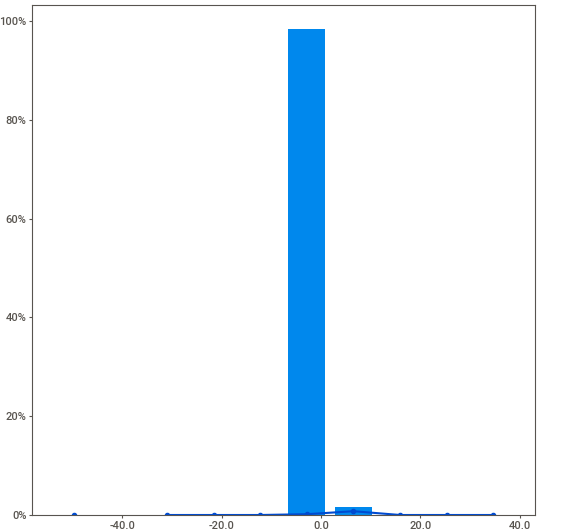
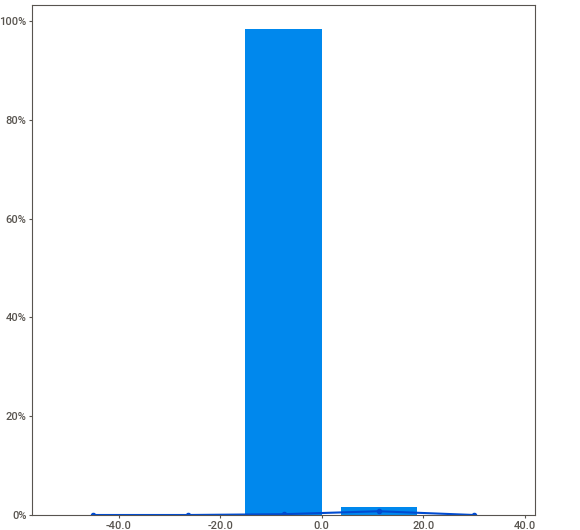
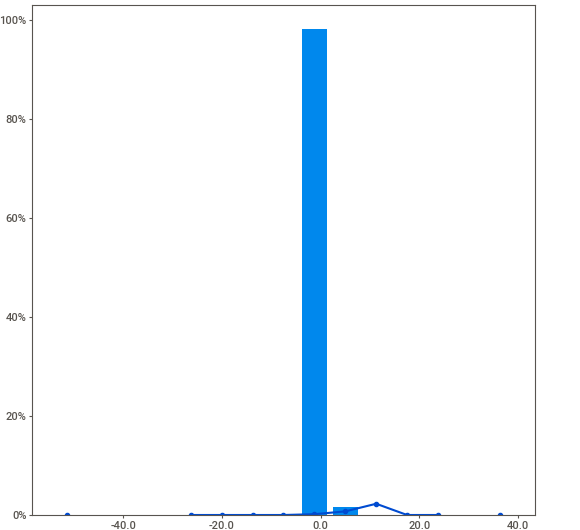
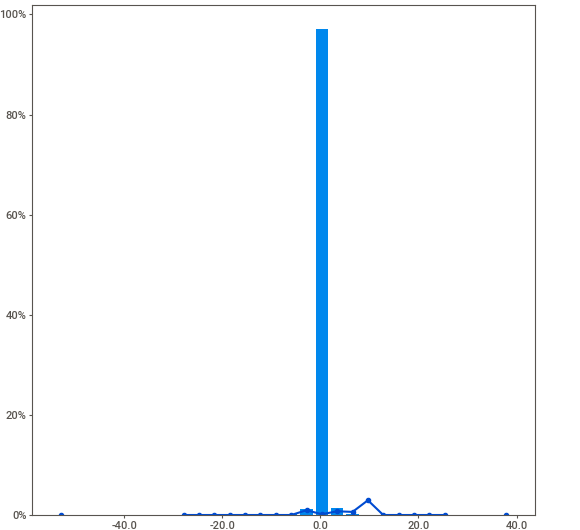
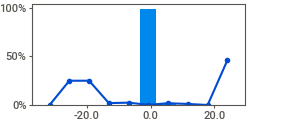
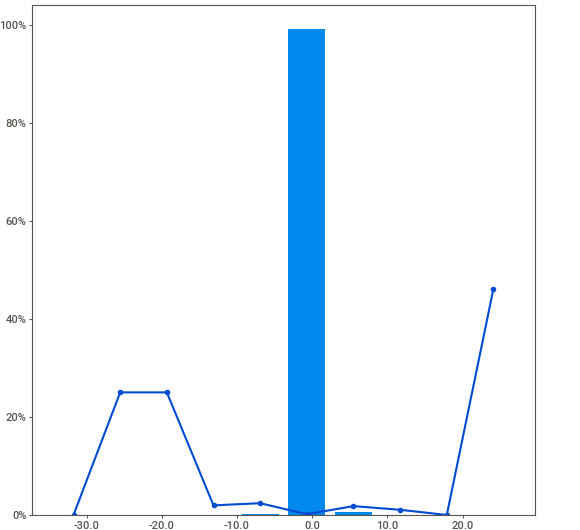
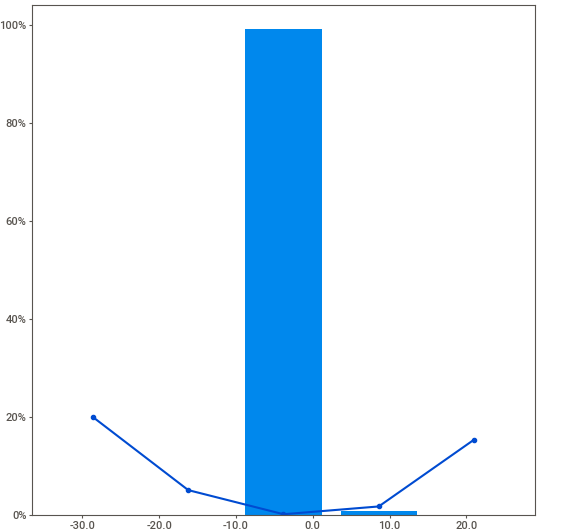
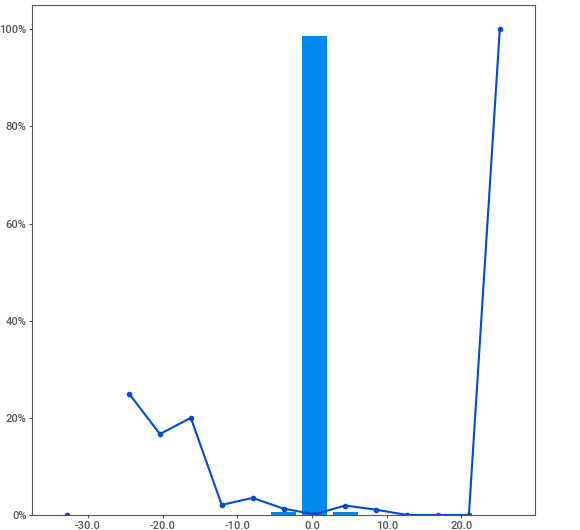
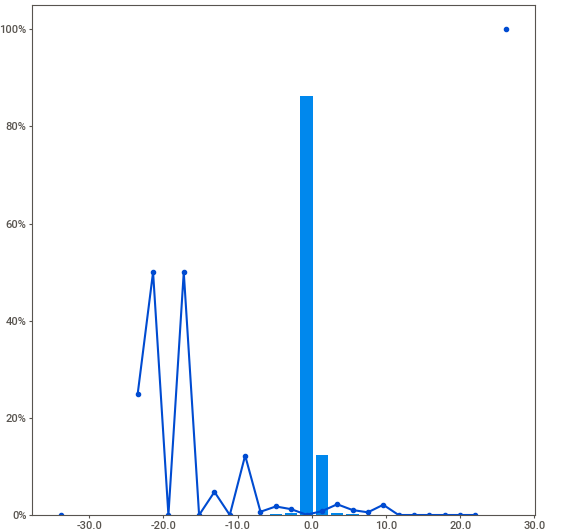
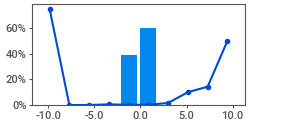
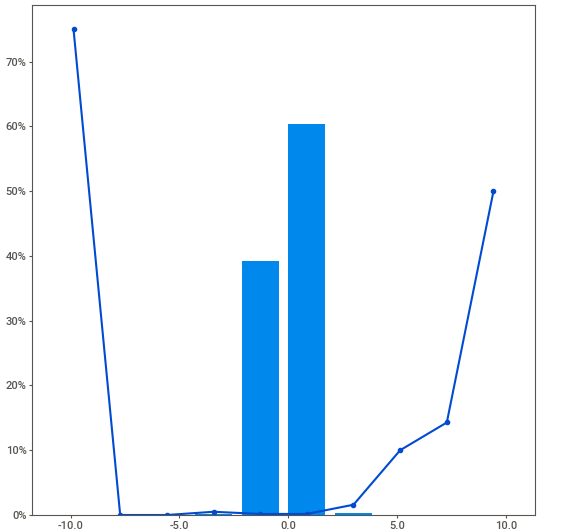
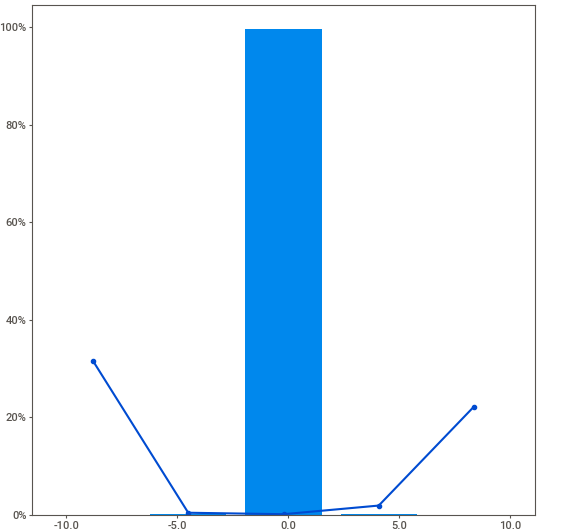
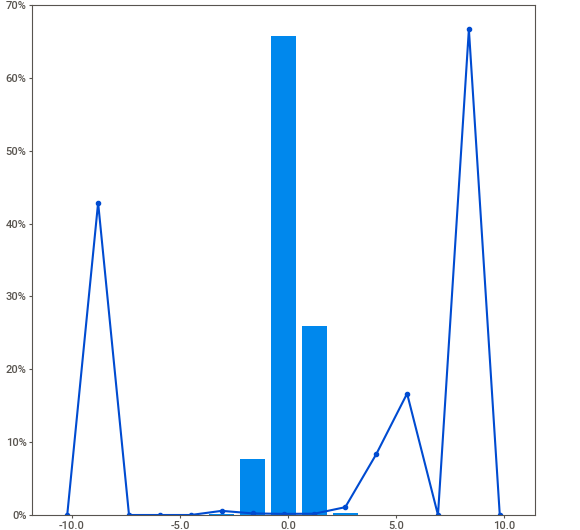
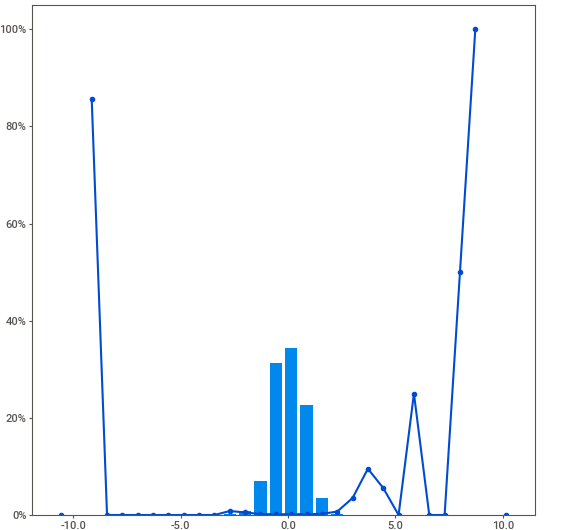
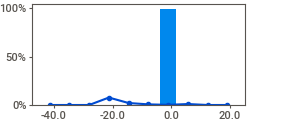
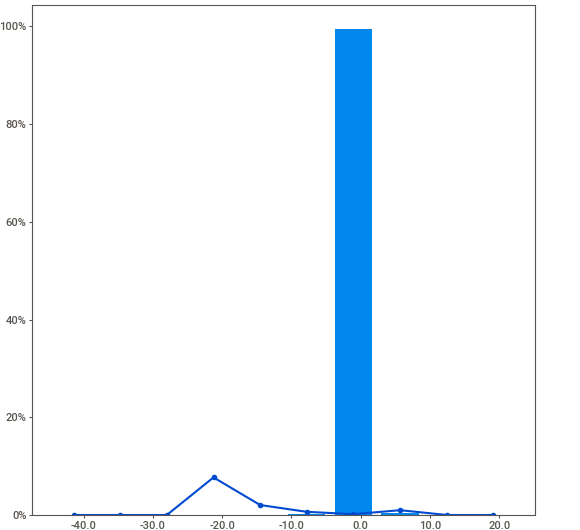
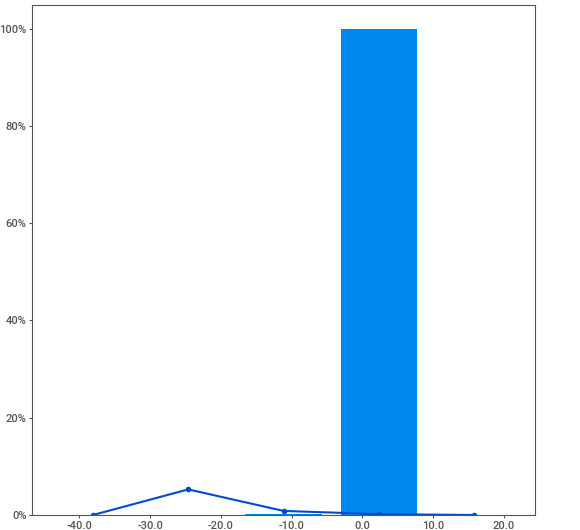
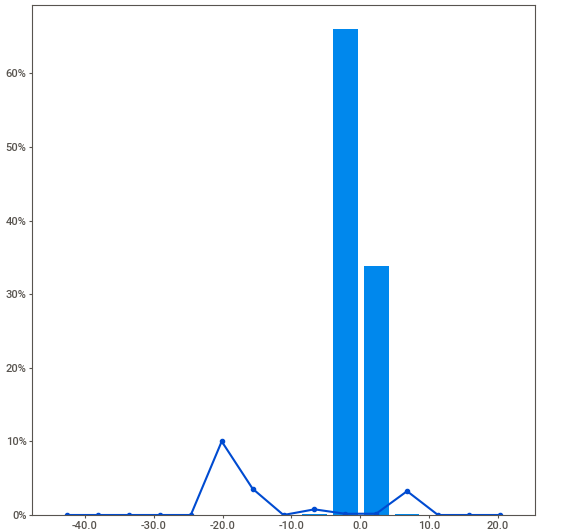
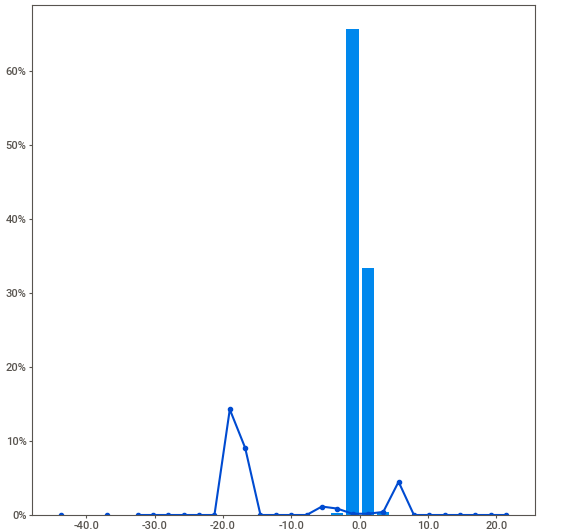
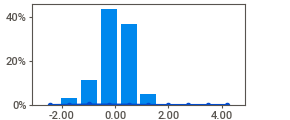
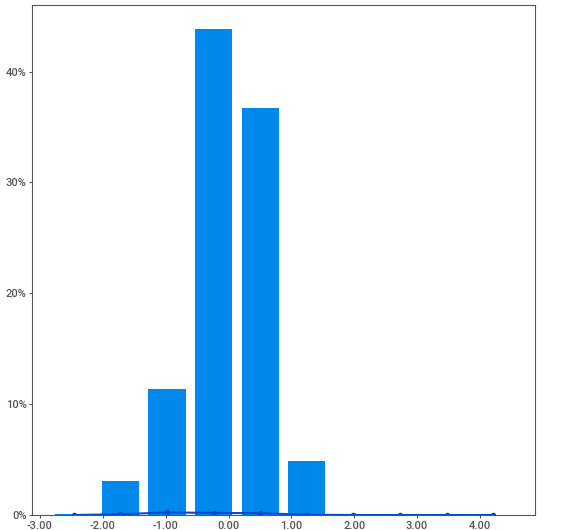
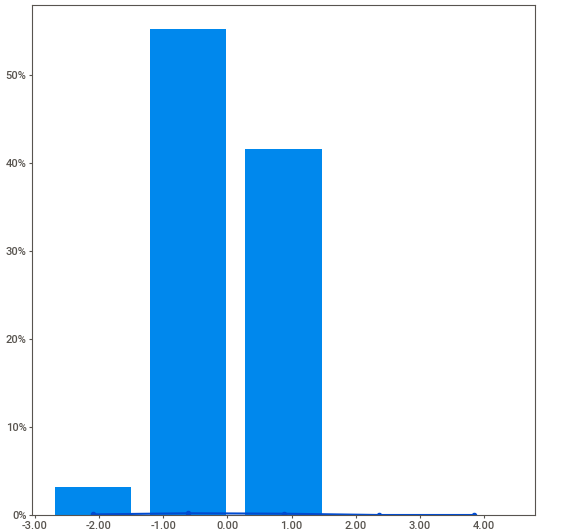
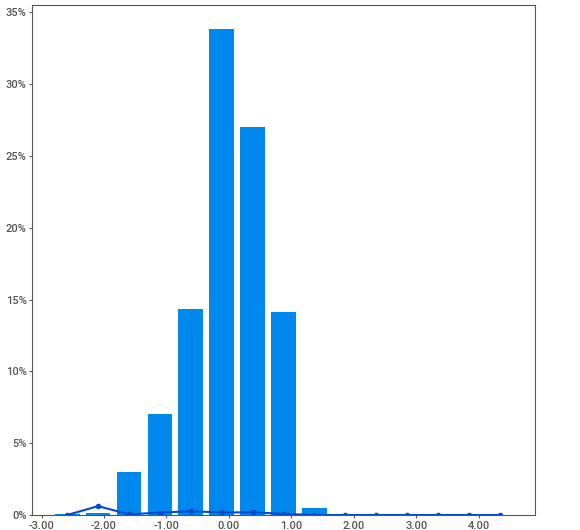
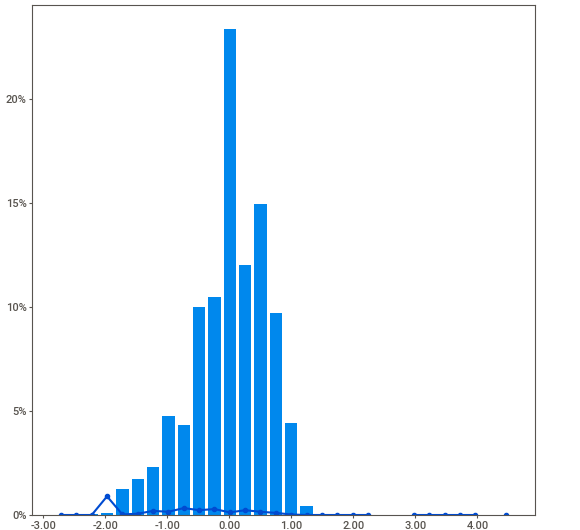
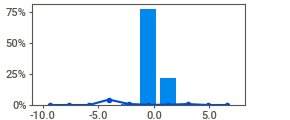
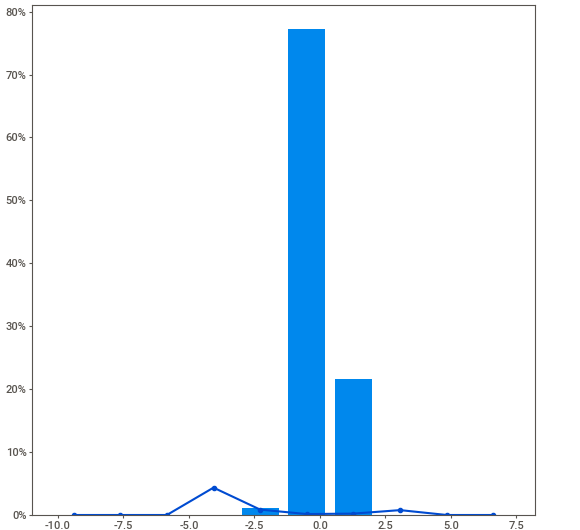
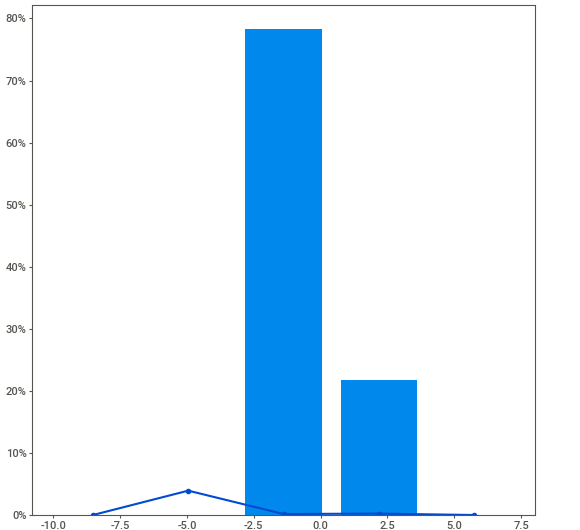
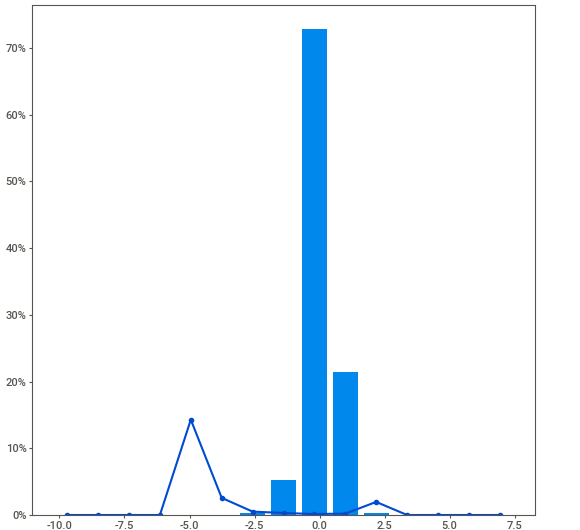
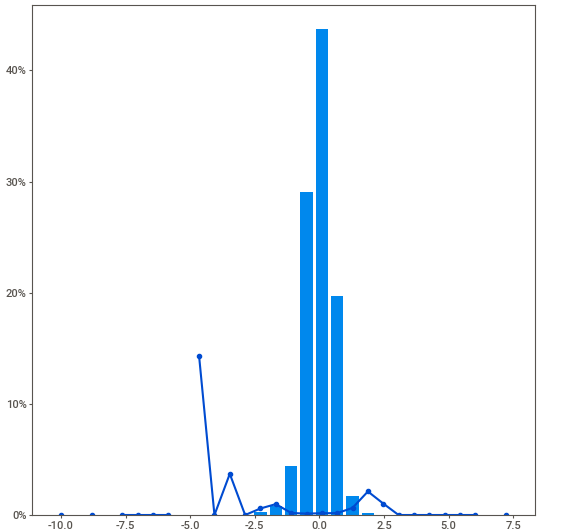
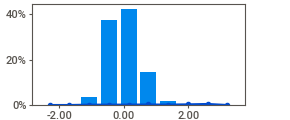
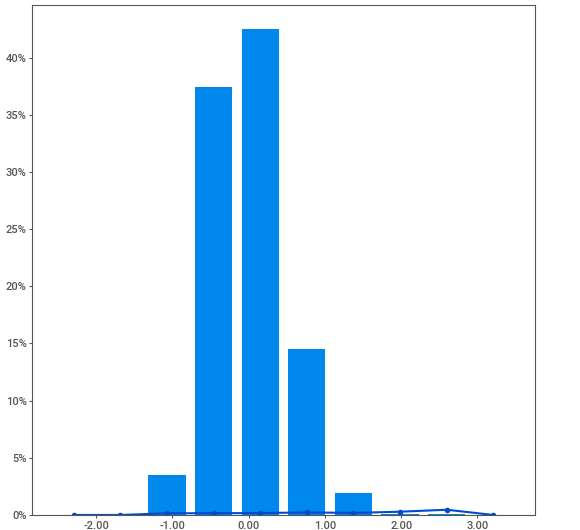
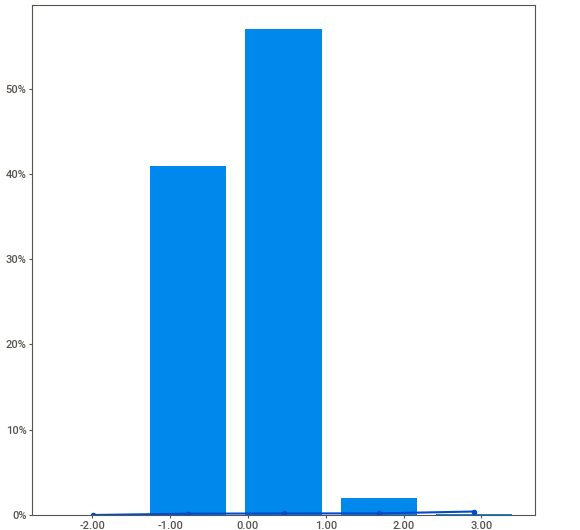
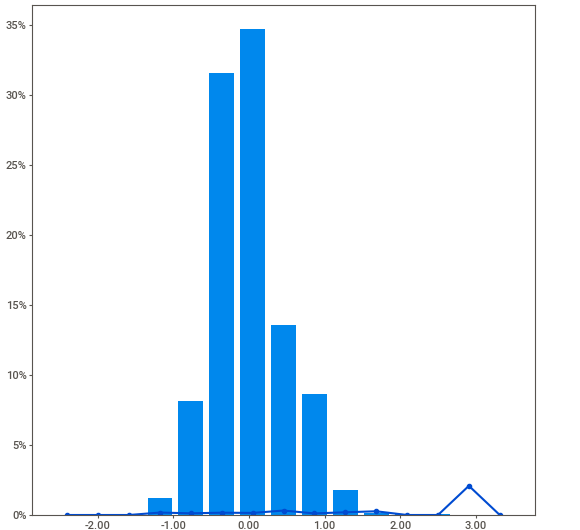
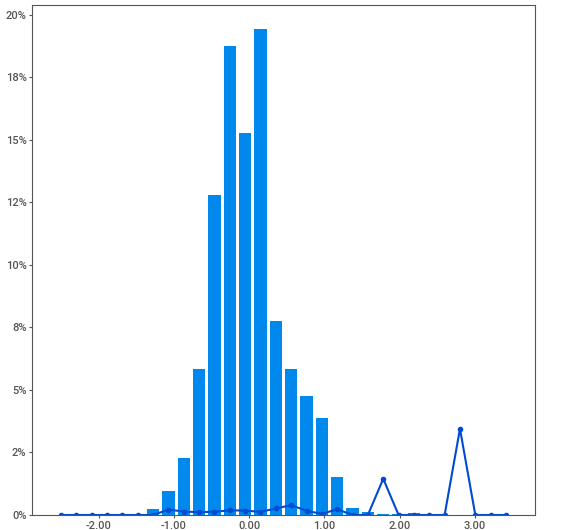
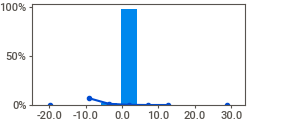
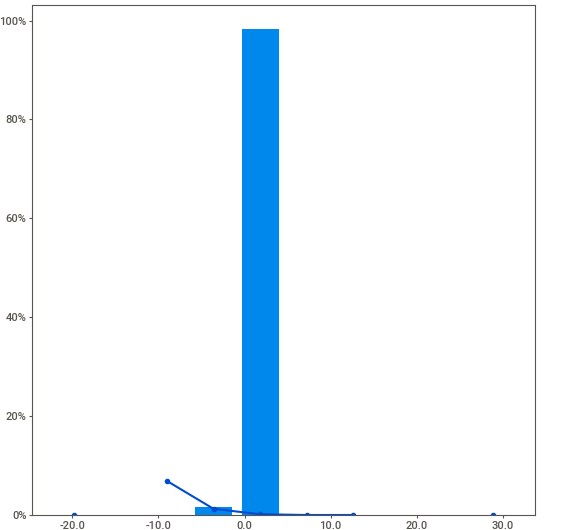
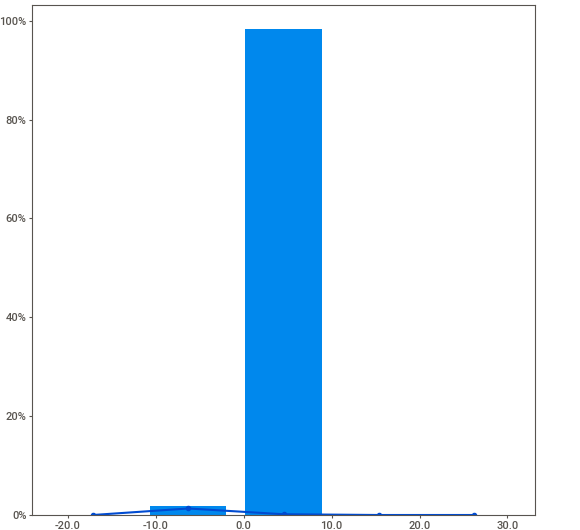
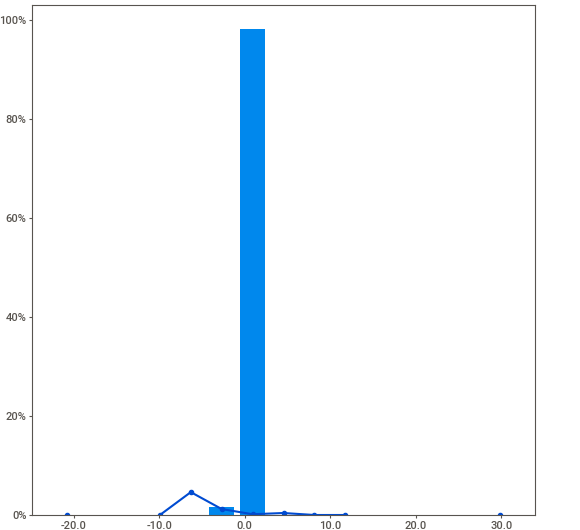
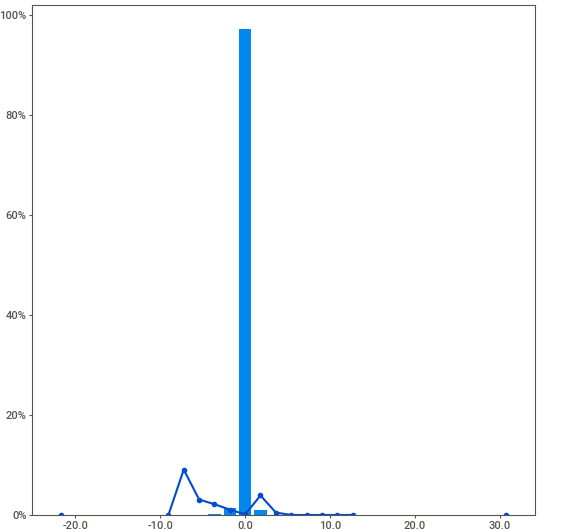
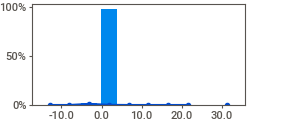
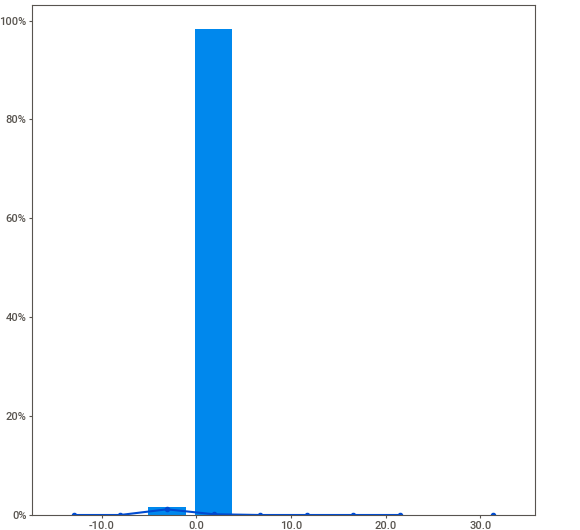
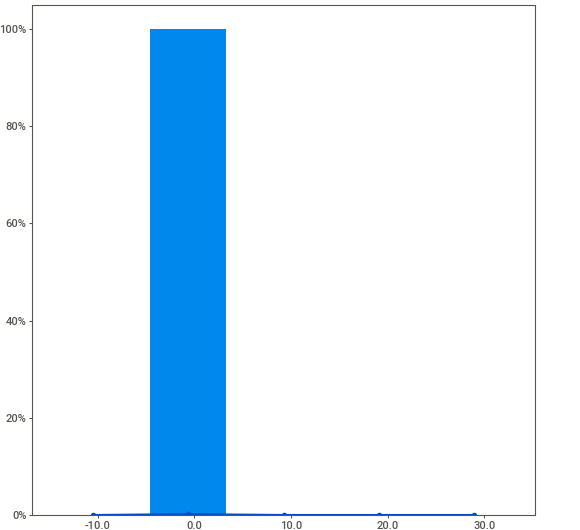
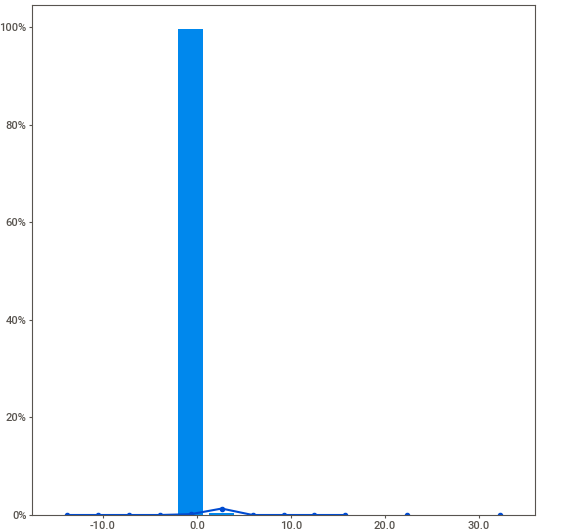
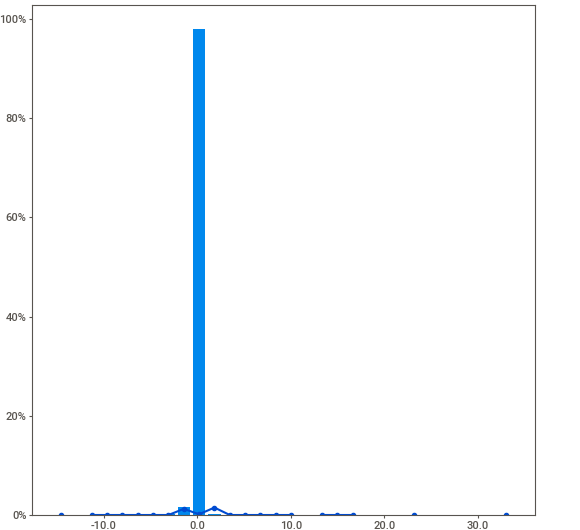
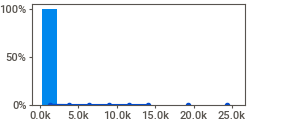
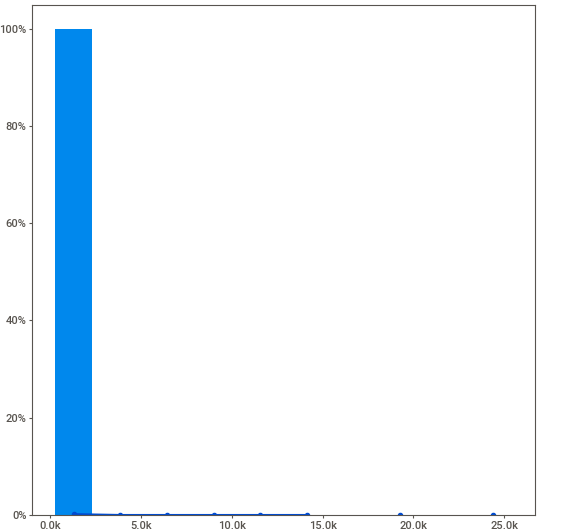
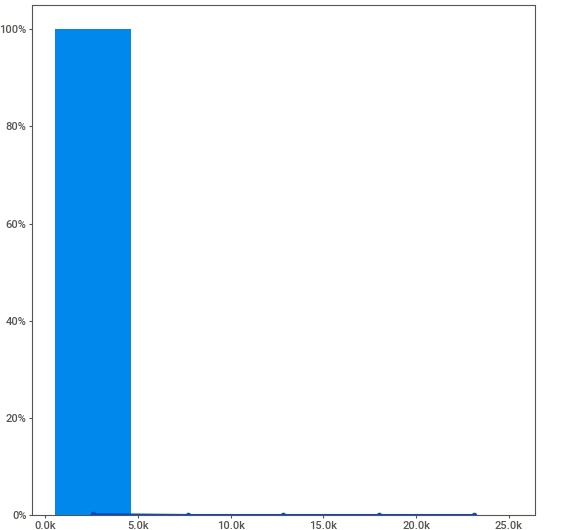
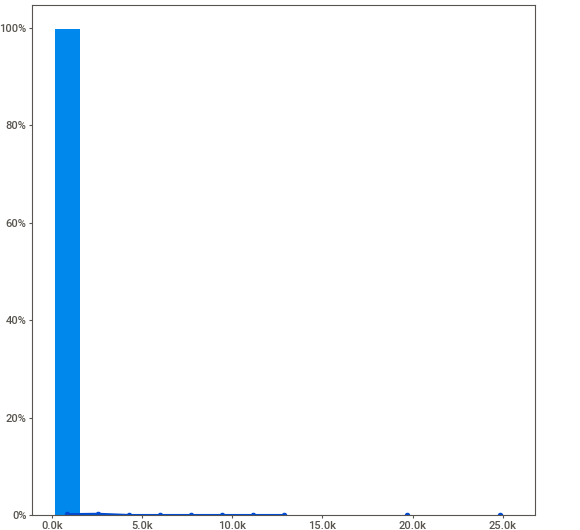
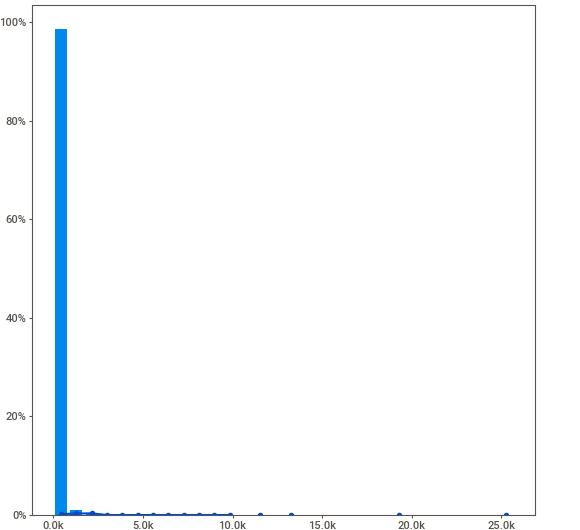
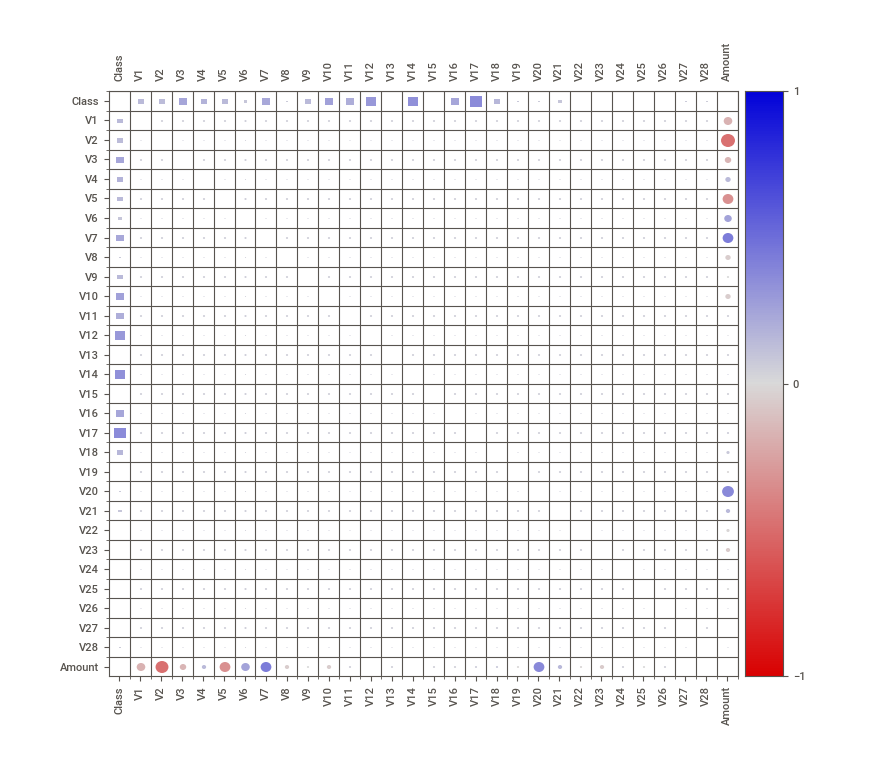
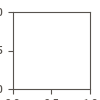

In [13]:
# Understanding the overall data in a detailed report form
report = sv.analyze(df,target_feat="Class") 
report.show_notebook()                      

## 5. Feature Engineering

In [14]:
# Adding a new column called "Day_Phases" to understand and gauge the transactions happening at different phases of the day
df["Day_Phases"] = df["Time"].apply(lambda x: 
    "Morning" if 6 <= x.hour < 12 else
    "Afternoon" if 12 <= x.hour < 18 else
    "Evening" if 18 <= x.hour < 24 else
    "Night"
)


In [15]:
df.head()  #Checking the first 5 rows for the newly added column

Time        V1        V2        V3        V4        V5  \
0 2013-09-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 2013-09-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 2013-09-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 2013-09-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 2013-09-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V22       V23       V24  \
0  0.462388  0.239599  0.098698  0.363787  ...  0.277838 -0.110474  0.066928   
1 -0.082361 -0.078803  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846   
2  1.800499  0.791461  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281   
3  1.247203  0.237609  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575   
4  0.095921  0.592941 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  Day_Phases  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0       Night  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0       Night  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0       Night  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0       Night  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0       Night  

[5 rows x 32 columns]

Text(0, 0.5, 'Number of Transactions')

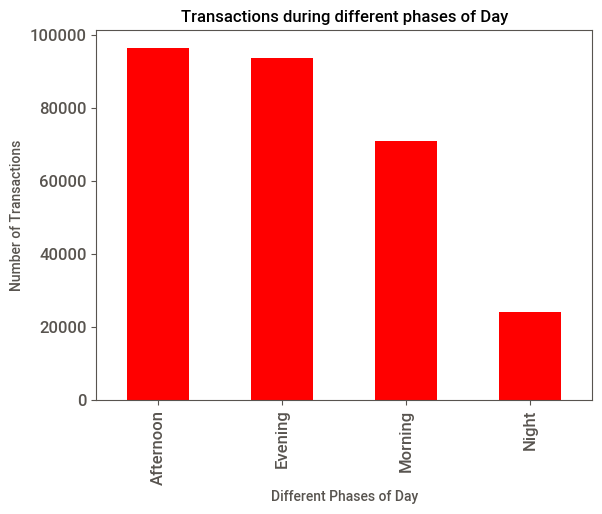

In [16]:
# Checking the number of transactions occurring at different phases of the day 
df["Day_Phases"].value_counts().plot(kind="bar",color="red",fontsize = 12) # Visualizing the bar graph
plt.title("Transactions during different phases of Day")
plt.xlabel("Different Phases of Day")
plt.ylabel("Number of Transactions")

**Bar Graph Insights:**

The bar graph reveals that credit cards were predominantly used during the afternoon and evening. This suggests that people are more active and make more transactions during these times, whereas the night time shows the least amount of transactions as the majority population is asleep.


In [18]:
# Calculate the elapsed time in seconds from the minimum timestamp in the 'Time' column
df['Time_elapsed'] = (df['Time'] - df['Time'].min()).dt.total_seconds()     

df['Hour'] = df['Time'].dt.hour         # Extracting hour from the Time feature
df['Minute'] = df['Time'].dt.minute     # Extracting minute from the Time feature
df['Second'] = df['Time'].dt.second     # Extracting second from the Time feature 



In [19]:
df.head()  # Checking the first 5 rows

Time        V1        V2        V3        V4        V5  \
0 2013-09-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 2013-09-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 2013-09-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 2013-09-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 2013-09-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V26       V27       V28  \
0  0.462388  0.239599  0.098698  0.363787  ... -0.189115  0.133558 -0.021053   
1 -0.082361 -0.078803  0.085102 -0.255425  ...  0.125895 -0.008983  0.014724   
2  1.800499  0.791461  0.247676 -1.514654  ... -0.139097 -0.055353 -0.059752   
3  1.247203  0.237609  0.377436 -1.387024  ... -0.221929  0.062723  0.061458   
4  0.095921  0.592941 -0.270533  0.817739  ...  0.502292  0.219422  0.215153   

   Amount  Class  Day_Phases  Time_elapsed  Hour  Minute  Second  
0  149.62      0       Night           0.0     0       0       0  
1    2.69      0       Night           0.0     0       0       0  
2  378.66      0       Night           1.0     0       0       1  
3  123.50      0       Night           1.0     0       0       1  
4   69.99      0       Night           2.0     0       0       2  

[5 rows x 36 columns]

In [20]:
df.tail()  # Checking the last 5 rows

Time         V1         V2        V3        V4  \
284802 2013-09-02 23:59:46 -11.881118  10.071785 -9.834783 -2.066656   
284803 2013-09-02 23:59:47  -0.732789  -0.055080  2.035030 -0.738589   
284804 2013-09-02 23:59:48   1.919565  -0.301254 -3.249640 -0.557828   
284805 2013-09-02 23:59:48  -0.240440   0.530483  0.702510  0.689799   
284806 2013-09-02 23:59:52  -0.533413  -0.189733  0.703337 -0.506271   

              V5        V6        V7        V8        V9  ...       V26  \
284802 -5.364473 -2.606837 -4.918215  7.305334  1.914428  ...  0.250034   
284803  0.868229  1.058415  0.024330  0.294869  0.584800  ... -0.395255   
284804  2.630515  3.031260 -0.296827  0.708417  0.432454  ... -0.087371   
284805 -0.377961  0.623708 -0.686180  0.679145  0.392087  ...  0.546668   
284806 -0.012546 -0.649617  1.577006 -0.414650  0.486180  ... -0.818267   

             V27       V28  Amount  Class  Day_Phases  Time_elapsed  Hour  \
284802  0.943651  0.823731    0.77      0     Evening      172786.0    23   
284803  0.068472 -0.053527   24.79      0     Evening      172787.0    23   
284804  0.004455 -0.026561   67.88      0     Evening      172788.0    23   
284805  0.108821  0.104533   10.00      0     Evening      172788.0    23   
284806 -0.002415  0.013649  217.00      0     Evening      172792.0    23   

        Minute  Second  
284802      59      46  
284803      59      47  
284804      59      48  
284805      59      48  
284806      59      52  

[5 rows x 36 columns]

In [21]:
df.info()   # Checking the datatypes for the newly added features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 36 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Time          284807 non-null  datetime64[ns]
 1   V1            284807 non-null  float64       
 2   V2            284807 non-null  float64       
 3   V3            284807 non-null  float64       
 4   V4            284807 non-null  float64       
 5   V5            284807 non-null  float64       
 6   V6            284807 non-null  float64       
 7   V7            284807 non-null  float64       
 8   V8            284807 non-null  float64       
 9   V9            284807 non-null  float64       
 10  V10           284807 non-null  float64       
 11  V11           284807 non-null  float64       
 12  V12           284807 non-null  float64       
 13  V13           284807 non-null  float64       
 14  V14           284807 non-null  float64       
 15  V15           284

In [22]:
# Transforming the 'Hour' feature into sine and cosine components.
# This is done to capture the cyclical nature of hours in a day.
# 'Hour_sin' and 'Hour_cos' represent the sine and cosine of the hour,
# allowing the model to learn patterns based on the circular nature of time.


df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)    # Sine transformation to capture the cyclical behavior 
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)    # Cosine transformation to capture the cyclical behavior 

In [23]:
df.head()  # Checking the first 5 rows for newly added features

Time        V1        V2        V3        V4        V5  \
0 2013-09-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 2013-09-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 2013-09-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 2013-09-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 2013-09-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V28  Amount  Class  \
0  0.462388  0.239599  0.098698  0.363787  ... -0.021053  149.62      0   
1 -0.082361 -0.078803  0.085102 -0.255425  ...  0.014724    2.69      0   
2  1.800499  0.791461  0.247676 -1.514654  ... -0.059752  378.66      0   
3  1.247203  0.237609  0.377436 -1.387024  ...  0.061458  123.50      0   
4  0.095921  0.592941 -0.270533  0.817739  ...  0.215153   69.99      0   

   Day_Phases  Time_elapsed  Hour  Minute  Second  Hour_sin  Hour_cos  
0       Night           0.0     0       0       0       0.0       1.0  
1       Night           0.0     0       0       0       0.0       1.0  
2       Night           1.0     0       0       1       0.0       1.0  
3       Night           1.0     0       0       1       0.0       1.0  
4       Night           2.0     0       0       2       0.0       1.0  

[5 rows x 38 columns]

In [24]:
df.tail()     # Checking the last 5 rows for newly added features

Time         V1         V2        V3        V4  \
284802 2013-09-02 23:59:46 -11.881118  10.071785 -9.834783 -2.066656   
284803 2013-09-02 23:59:47  -0.732789  -0.055080  2.035030 -0.738589   
284804 2013-09-02 23:59:48   1.919565  -0.301254 -3.249640 -0.557828   
284805 2013-09-02 23:59:48  -0.240440   0.530483  0.702510  0.689799   
284806 2013-09-02 23:59:52  -0.533413  -0.189733  0.703337 -0.506271   

              V5        V6        V7        V8        V9  ...       V28  \
284802 -5.364473 -2.606837 -4.918215  7.305334  1.914428  ...  0.823731   
284803  0.868229  1.058415  0.024330  0.294869  0.584800  ... -0.053527   
284804  2.630515  3.031260 -0.296827  0.708417  0.432454  ... -0.026561   
284805 -0.377961  0.623708 -0.686180  0.679145  0.392087  ...  0.104533   
284806 -0.012546 -0.649617  1.577006 -0.414650  0.486180  ...  0.013649   

        Amount  Class  Day_Phases  Time_elapsed  Hour  Minute  Second  \
284802    0.77      0     Evening      172786.0    23      59      46   
284803   24.79      0     Evening      172787.0    23      59      47   
284804   67.88      0     Evening      172788.0    23      59      48   
284805   10.00      0     Evening      172788.0    23      59      48   
284806  217.00      0     Evening      172792.0    23      59      52   

        Hour_sin  Hour_cos  
284802 -0.258819  0.965926  
284803 -0.258819  0.965926  
284804 -0.258819  0.965926  
284805 -0.258819  0.965926  
284806 -0.258819  0.965926  

[5 rows x 38 columns]

In [25]:
df.info()        # Checking the datatypes for the newly added features  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Time          284807 non-null  datetime64[ns]
 1   V1            284807 non-null  float64       
 2   V2            284807 non-null  float64       
 3   V3            284807 non-null  float64       
 4   V4            284807 non-null  float64       
 5   V5            284807 non-null  float64       
 6   V6            284807 non-null  float64       
 7   V7            284807 non-null  float64       
 8   V8            284807 non-null  float64       
 9   V9            284807 non-null  float64       
 10  V10           284807 non-null  float64       
 11  V11           284807 non-null  float64       
 12  V12           284807 non-null  float64       
 13  V13           284807 non-null  float64       
 14  V14           284807 non-null  float64       
 15  V15           284

In [26]:
# Drop the original time-related features
df = df.drop(['Time', 'Time_elapsed', 'Hour', 'Minute', 'Second'], axis=1)

In [27]:
df.info()    # Checking the datatypes for the remaining features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   V1          284807 non-null  float64
 1   V2          284807 non-null  float64
 2   V3          284807 non-null  float64
 3   V4          284807 non-null  float64
 4   V5          284807 non-null  float64
 5   V6          284807 non-null  float64
 6   V7          284807 non-null  float64
 7   V8          284807 non-null  float64
 8   V9          284807 non-null  float64
 9   V10         284807 non-null  float64
 10  V11         284807 non-null  float64
 11  V12         284807 non-null  float64
 12  V13         284807 non-null  float64
 13  V14         284807 non-null  float64
 14  V15         284807 non-null  float64
 15  V16         284807 non-null  float64
 16  V17         284807 non-null  float64
 17  V18         284807 non-null  float64
 18  V19         284807 non-null  float64
 19  V2

In [28]:
def data_type(dataset):            # Creating a custom function to identify numerical and categorical features
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype in ["int64", "float64"]:
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

numerical, categorical = data_type(df)

In [29]:
print(f" Numerical Columns : {numerical}")          # Printing the numerical features
print(f" Categorical Columns : {categorical}")      # Printing the categorical features

 Numerical Columns : ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class', 'Hour_sin', 'Hour_cos']
 Categorical Columns : ['Day_Phases']


In [30]:
binary = [col for col in numerical if df[col].nunique() == 2]   # Identifying binary features to stop them from scaling

In [31]:
numerical = [col for col in numerical if col not in binary]     # Removing binary features from numerical features

In [32]:
print(f" Numerical Columns : {numerical}")        # Printing the numerical features
print(f" Binary Columns : {binary}")              # Printing the binary features  

 Numerical Columns : ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour_sin', 'Hour_cos']
 Binary Columns : ['Class']


In [33]:
from sklearn.preprocessing import StandardScaler    # Importing the standard scaler

In [34]:
def encoding(dataset, categorical):               # Creating a custom function to encode the categorical features
    
    for i in categorical:
        dataset[i] = dataset[i].astype("category")
        dataset[i] = dataset[i].cat.codes
    return dataset

df = encoding(df, categorical)

In [35]:
# Now scale the data
def feature_Scaling(dataset,numerical):
    scaled_data = StandardScaler()
    dataset[numerical] = scaled_data.fit_transform(dataset[numerical])
    return dataset

df = feature_Scaling(df,numerical)

**Importance of Scaling the Data:**

Scaling the data is essential because it ensures that all features are on the same axis. This helps in identifying more relevant patterns and leads to better and more accurate results.
 

In [36]:
df.head()            # Checking the first 5 rows of the scaled data

V1        V2        V3        V4        V5        V6        V7  \
0 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068  0.193679   
1  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820 -0.063700   
2 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454  0.639776   
3 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150  0.192071   
4 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999  0.479302   

         V8        V9       V10  ...       V24       V25       V26       V27  \
0  0.082637  0.331128  0.083386  ...  0.110507  0.246585 -0.392170  0.330892   
1  0.071253 -0.232494 -0.153350  ... -0.561131  0.320694  0.261069 -0.022256   
2  0.207373 -1.378675  0.190700  ... -1.138092 -0.628537 -0.288447 -0.137137   
3  0.316018 -1.262503 -0.050468  ... -1.941027  1.241904 -0.460217  0.155396   
4 -0.226510  0.744326  0.691625  ...  0.233250 -0.395202  1.041611  0.543620   

        V28    Amount  Class  Day_Phases  Hour_sin  Hour_cos  
0 -0.063781  0.244964      0           3  0.375742  1.683319  
1  0.044608 -0.342475      0           3  0.375742  1.683319  
2 -0.181021  1.160686      0           3  0.375742  1.683319  
3  0.186189  0.140534      0           3  0.375742  1.683319  
4  0.651816 -0.073403      0           3  0.375742  1.683319  

[5 rows x 33 columns]

In [37]:
df.tail()            # Checking the last 5 rows of the scaled data

V1        V2        V3        V4        V5        V6        V7  \
284802 -6.065842  6.099286 -6.486245 -1.459641 -3.886611 -1.956690 -3.975628   
284803 -0.374121 -0.033356  1.342145 -0.521651  0.629040  0.794446  0.019667   
284804  0.980024 -0.182434 -2.143205 -0.393984  1.905833  2.275262 -0.239939   
284805 -0.122755  0.321250  0.463320  0.487192 -0.273836  0.468155 -0.554672   
284806 -0.272331 -0.114899  0.463866 -0.357570 -0.009089 -0.487602  1.274769   

              V8        V9       V10  ...       V24       V25       V26  \
284802  6.116573  1.742559  4.000715  ... -0.841000  2.756320  0.518500   
284803  0.246886  0.532299 -0.896292  ... -1.677920 -1.163726 -0.819647   
284804  0.593140  0.393630 -0.445225  ...  1.056944  0.509797 -0.181182   
284805  0.568631  0.356887 -0.366558  ...  0.203428 -1.091855  1.133635   
284806 -0.347176  0.442532 -0.840730  ...  0.014526 -0.908631 -1.696853   

             V27       V28    Amount  Class  Day_Phases  Hour_sin  Hour_cos  
284802  2.337901  2.495529 -0.350151      0           1 -0.022112  1.634475  
284803  0.169641 -0.162164 -0.254117      0           1 -0.022112  1.634475  
284804  0.011037 -0.080467 -0.081839      0           1 -0.022112  1.634475  
284805  0.269604  0.316687 -0.313249      0           1 -0.022112  1.634475  
284806 -0.005984  0.041350  0.514355      0           1 -0.022112  1.634475  

[5 rows x 33 columns]

**Addressing Class Imbalance:**

Given the identified imbalance between positive and negative classes, it is crucial to address this issue. This will help to mitigate overfitting to the negative class and improve the accuracy of predictions on unseen data.
 

In [38]:
X = df.drop(columns=["Class"])    # Drop the 'Class' column to get features
y = df["Class"]                   # Target variable

count_0 = y.value_counts()[0]     # Number of instances of class 0 (negative class)
count_1 = y.value_counts()[1]     # Number of instances of class 1 (positive class)

# Calculating the average number of instances across both classes
# This average will be used for resampling strategies
average_count = int((count_0 + count_1) / 2)

In [39]:
# Importing necessary libraries for handling class imbalance 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

# Define a random state for reproducibility
random_state = 42

# Creating a resampling pipeline to address class imbalance
resampling_pipeline = Pipeline([
    # Applying SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class
    # `sampling_strategy={1: average_count}` specifies the target number of samples for the minority class
    ('oversampler', SMOTE(sampling_strategy={1: average_count}, random_state = random_state)),
    
    # Applying RandomUnderSampler to undersample the majority class
    # `sampling_strategy={0: average_count}` specifies the target number of samples for the majority class    
    ('undersampler', RandomUnderSampler(sampling_strategy={0: average_count}, random_state = random_state))
])

In [40]:
# Applying the resampling pipeline to balance the classes in the dataset
X_resampled, y_resampled = resampling_pipeline.fit_resample(X, y)

In [41]:
# Verify the new class distribution
print(y_resampled.value_counts())

Class
0    142403
1    142403
Name: count, dtype: int64


In [42]:
# Assuming X is a DataFrame and y is a Series
df = pd.concat([X_resampled, y_resampled], axis=1)

In [43]:
df = df.reset_index(drop=True)

# Display the first 5 rows of the DataFrame
df.head(5)

V1        V2        V3        V4        V5        V6        V7  \
0  0.671131  0.357682 -0.439632  0.506096  0.218786 -0.844775  0.314351   
1 -0.407758  0.717670  0.596568  0.490572  0.158697 -0.239663  0.400323   
2 -0.199689 -0.148694  0.740031 -0.924328 -0.463607  0.006514 -0.566897   
3 -0.030787  0.645001 -0.651224 -0.020883  0.127786 -1.012212  0.626990   
4  0.943707  0.226102  0.177590  2.730794  0.063802  0.728417 -0.583583   

         V8        V9       V10  ...       V24       V25       V26       V27  \
0 -0.241461 -0.120275 -0.548965  ... -0.330547  1.226778  0.828399 -0.085030   
1  0.116606 -0.691965  0.156631  ...  0.022658 -0.472812 -0.788131 -0.981167   
2 -0.022870 -2.392847  1.883929  ... -0.806811 -0.594259  0.016798  0.405608   
3  0.112901 -0.136292 -1.137531  ... -0.208487 -0.652096 -0.311649 -0.058553   
4  0.197583  0.622130  1.071164  ...  1.143229 -0.396200 -0.044228 -0.049111   

        V28    Amount  Day_Phases  Hour_sin  Hour_cos  Class  
0  0.096014 -0.350191           1 -0.392853  1.491272      0  
1 -0.342038 -0.336517           0 -0.392853 -0.991541      0  
2  0.725824 -0.293258           0 -0.711215 -0.763739      0  
3  0.128240 -0.125338           2  1.706988 -0.466861      0  
4 -0.129306 -0.353229           3  0.773596  1.634475      0  

[5 rows x 33 columns]

**Feature Analysis and Dimensionality Reduction:-**

The data predominantly consists of numerical features like V1, V2, etc., which lack descriptive titles, making it difficult to understand their significance. To address this, we will use Principal Component Analysis (PCA) to reduce the number of features. Reducing the number of features not only helps in simplifying the model but also reduces computational costs.


In [44]:
# Importing Principal Component Analysis (PCA) from scikit-learn
# Used for Dimensionality reduction
from sklearn.decomposition import PCA    

In [45]:
features = df.drop(columns=["Class"])        # Drop the 'Class' column to get features
target = df["Class"]                         # Target variable

In [46]:
pca = PCA()       # Creating a instance of the class PCA
pca.fit(features) # Fitting the features to the created PCA object

PCA()

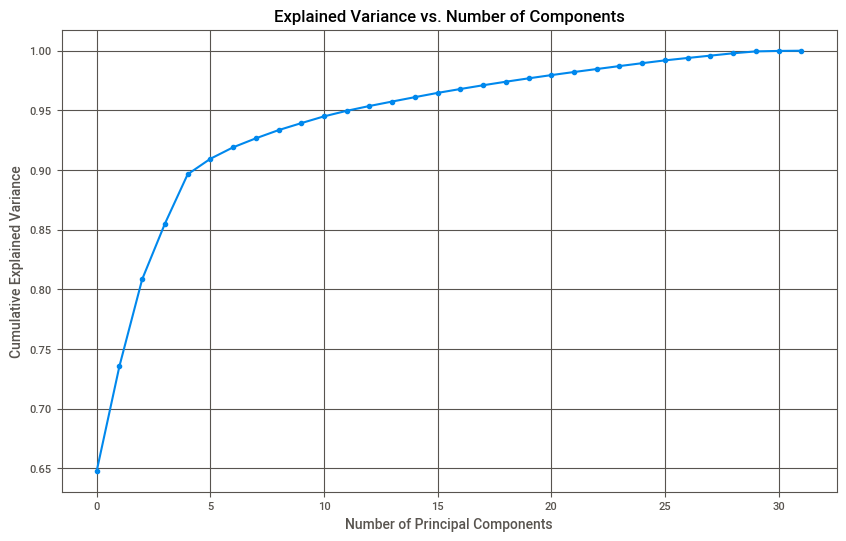

In [47]:
# Plot explained variance ratio
explained_variance = pca.explained_variance_ratio_
# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')      # Plot with markers
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True) # Add grid for better readability
plt.show()     # Display the plot

**It can be seen from the graph that almost around 96% of the variance is explained by 13 components.**

In [48]:
# Obtain the eigenvalues (explained variance) for each principal component
eigenvalues = pca.explained_variance_


# Apply Kaiser’s Criterion: Retain components with eigenvalues greater than 1
components_to_retain = sum(eigenvalues > 1)

# Print the number of components to retain
print(f"Number of components to retain (Kaiser’s Criterion): {components_to_retain}")

Number of components to retain (Kaiser’s Criterion): 13


In [49]:
# Initialize PCA with 13 components
pca = PCA(n_components=13)

# Fit and transform the data
pca_features = pca.fit_transform(features)

In [50]:
print(features.shape)           # Print the shape of the original features before PCA
print(pca_features.shape)       # Print the shape of the features after applying PCA

(284806, 32)
(284806, 13)


## 6. Splitting the dataset

In [51]:
from sklearn.model_selection import train_test_split   # To split the dataset into train and test 

In [52]:
# Split the dataset into train and keep 20% of data for validating purpose

x_train,x_test,y_train,y_test = train_test_split(pca_features,target,test_size=0.2,stratify=target,random_state=42)

In [53]:
print(x_train.shape)    # Check the shape of the train data
print(x_test.shape)     # Check the shape of the test data

(227844, 13)
(56962, 13)


## 7. Model Selection & Creation

In [54]:
from sklearn.ensemble import RandomForestClassifier    # Import the Random Forest model from scikit-learn

In [55]:
random_model = RandomForestClassifier()   # Creating a instance of the class RandomForestClassifier
random_model.fit(x_train,y_train)         # Fitting the train data to the created classifier object

RandomForestClassifier()

In [56]:
y_pred = random_model.predict(x_test)   # Use the model to predict on the test data

## 8. Model Evaluation

In [57]:
# Importing the evluation metrics
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28481
           1       1.00      1.00      1.00     28481

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



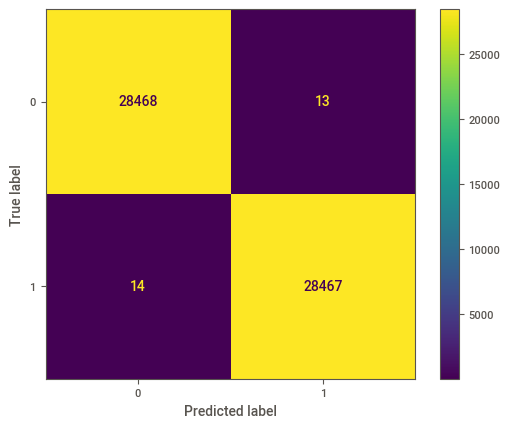

In [58]:
# Print the classification report to check the recall, precison, accuracy of the model
print(classification_report(y_test,y_pred))   

# Display the confusion matrix 
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

**The model's performance appears flawless, with all metrics—precision, recall, and F1-score—showing a perfect value of 1.00. This suggests that the model has accurately classified every instance in the test set.**

While these results may seem ideal, they warrant a closer examination. Such perfection raises concerns about potential issues like overfitting or data leakage. These phenomena could lead to artificially inflated performance metrics, undermining the model's ability to generalize to new, unseen data.

Also these results were obtained after applying PCA for dimensionality reduction, it indicates that the transformed features still capture sufficient information for the model to perform exceptionally well. However, it’s essential to further validate the model on different datasets to ensure its robustness and reliability.


### Hyper parameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV    # Import Gridseaerch to find best set of hyper parameters

In [60]:
#parameters = {"min_samples_split" : [10,20], "max_depth" : [None, 10, 20, 30],
            #  "n_estimators" : [100,200,300], "bootstrap" : [True, False]}

**This was my original set of parameters chosen for the `GridSearch`. However, even after waiting for an hour, the kernel was still running. The likely reasons could be the large dataset combined with a somewhat complex parameter grid, which might have overwhelmed my system due to memory allocation and CPU power.**  

**So I decided to simplify my parameter grid and perform the `GridSearch`.**


In [61]:
parameters = {                               # Parameter grid 
    "max_depth": [None, 10, 20],
    "n_estimators": [100, 200]}

In [62]:
# GridSerachCV model using metric as accuracy and cv as 3
grid_search = GridSearchCV(estimator=random_model, param_grid=parameters, scoring= "accuracy", cv=3, n_jobs = -1, verbose=2)

In [63]:
grid_search.fit(x_train,y_train)                       # Fitting the model on training data
print(f"Best parameters: {grid_search.best_params_}")  # Printing the best parameters
print(f"Best score: {grid_search.best_score_}")        # Printing the best score/accuracy 

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'max_depth': None, 'n_estimators': 200}
Best score: 0.9990739277751444


In [64]:
# Tuning the model with the newly selected hyper parameters
tuned_model = RandomForestClassifier(n_estimators=200, max_depth=None)  

In [65]:
tuned_model.fit(x_train,y_train)      # Fit the tuned model on the training data

RandomForestClassifier(n_estimators=200)

In [66]:
y_pred_tuned = tuned_model.predict(x_test)         # Use the model to predict on the test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28481
           1       1.00      1.00      1.00     28481

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



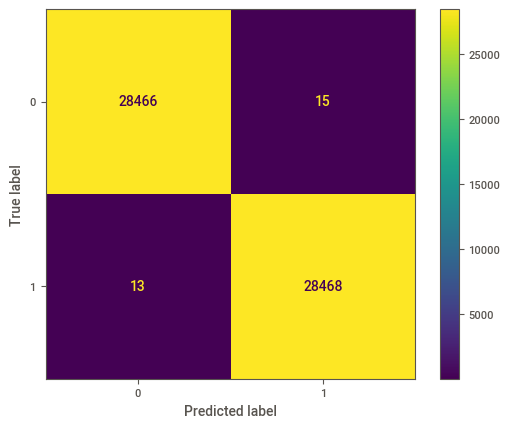

In [67]:
# Print the classification report to check the recall, precison, accuracy of the model
print(classification_report(y_test,y_pred_tuned))

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_tuned)).plot()

**After conducting the GridSearch, the model's performance metrics—precision, recall, and F1-score—remain unchanged at a perfect 1.00 across both classes, with an overall accuracy of 1.00. This indicates that even after tuning, the model continues to generalize exceptionally well on the test dataset, correctly classifying every instance. The consistency in these results suggests that the model is robust and effectively captures the underlying patterns in the data, minimizing the risk of overfitting while maintaining high predictive accuracy.**


## Exploring a New Approach

**Now, let's experiment with a different strategy:**

Instead of relying on a **traditional supervised learning model**, we will **leverage the power of a deep learning model**. The goal is to **compare its performance** against our current benchmark, the `RandomForestClassifier`, and observe how it fares in terms of accuracy, generalization, and robustness.





In [68]:
from tensorflow.keras.models import Sequential        # Import the sequential model
from tensorflow.keras.layers import Dense, Dropout    # Import the layers 
from tensorflow.keras.utils import to_categorical     # Import the to_categorical attribute


# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))  # Input layer + hidden layer
model.add(Dropout(0.3))  # Dropout for regularization
model.add(Dense(32, activation='relu'))  # Additional hidden layer
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()  # check the number of trainable parameters

C:\Users\Shubham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,042 (11.88 KB)

 Trainable params: 3,042 (11.88 KB)

 Non-trainable params: 0 (0.00 B)

**The model has more than 3 thousand trainable parameters.**

In [69]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9324 - loss: 0.1716 - val_accuracy: 0.9680 - val_loss: 0.0865
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9638 - loss: 0.0988 - val_accuracy: 0.9791 - val_loss: 0.0606
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9719 - loss: 0.0787 - val_accuracy: 0.9831 - val_loss: 0.0495
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9761 - loss: 0.0680 - val_accuracy: 0.9830 - val_loss: 0.0458
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9770 - loss: 0.0659 - val_accuracy: 0.9860 - val_loss: 0.0406
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9781 - loss: 0.0615 - val_accuracy: 0.9864 - val_loss: 0.0374
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9790 - loss: 0.0615 - val_accuracy: 0.9860 - val_loss: 0.0359
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9796 - loss: 0

**Final Performance:**  
  Test Accuracy: After training, the model achieves a test accuracy of 98.90%, which is excellent.  
  
  Test Loss: The final test loss is 0.0301, indicating the model is well-calibrated and not overfitting.  

**Summary:**  
  Model Performance: The model is performing exceptionally well, with nearly perfect accuracy and very low loss on both training   and validation data. The validation accuracy being so close to the training accuracy suggests that the model generalizes well   to unseen data.  
  
  Efficiency: Each epoch takes around 15 seconds, indicating that the model is efficiently processing the data.

## Model Performance and Deployment Comparison

Both the deep learning model and the `RandomForestClassifier` have demonstrated exceptional performance:

- **Deep Learning Model**:
  - **Test Accuracy**: 98.90%
  - **Advantages**: Can capture complex patterns and relationships in data. May be beneficial for very large and complex datasets.
  - **Deployment Considerations**: Typically requires more computational resources and may involve longer training and inference times. Deployment can be more complex, requiring specialized hardware (like GPUs) and frameworks.

- **RandomForestClassifier**:
  - **Test Accuracy**: 100%
  - **Advantages**: Provides perfect accuracy with excellent precision, recall, and F1-scores. Generally more interpretable and easier to understand. 
  - **Deployment Considerations**: Usually more resource-efficient compared to deep learning models. Easier to deploy and integrate into production environments. Requires less computational power and can run efficiently on standard hardware.

**Conclusion**:
While both models perform exceptionally well, the `RandomForestClassifier` may be preferred for deployment due to its simpler resource requirements and ease of integration. The deep learning model, though highly accurate, may be better suited for scenarios where capturing complex data patterns is critical and computational resources are available.

Ultimately, the choice of model should consider not only performance metrics but also deployment constraints, resource availability, and integration requirements.


In [70]:
import sklearn
print(sklearn.__version__)

1.5.1


**I checked the version of my sckit-learn because in older versions the `joblib` was available in sckit-learn but not the case for the newer versions.**

## Model Deployment with `joblib`

To deploy my best model, I used the `joblib` library, which is well-suited for saving and loading Python objects, including machine learning models.

### Saving the Model

You can save your trained model to a file using `joblib`, allowing you to persist the model and reuse it later without retraining.


In [71]:
# pip install joblib       # Installing the joblib library

In [72]:
import joblib        # Import the joblib module

In [73]:
# Saving the model
joblib.dump(tuned_model,"Random_Forest.pkl")

['Random_Forest.pkl']

In [74]:
# Saving the model
joblib.dump(pca, "Dimensionality_Reduction.pkl")

['Dimensionality_Reduction.pkl']

In [75]:
# Saving the model
joblib.dump(model, "Deep_Learning.pkl")

['Deep_Learning.pkl']